### Ella results plots

In [ ]:
import time
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import beta
from collections import Counter
from matplotlib_venn import venn2

# transparent background
plt.rcParams.update({
    "figure.facecolor":  (0.0, 0.0, 0.0, 0.0),  
    "axes.facecolor":    (0.0, 0.0, 0.0, 0.0),  
})

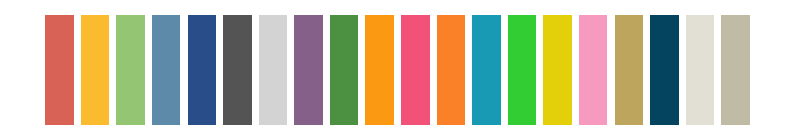

In [89]:
# define colors
purple = '#856088'
pink = '#F25278'
red = '#d96256'
lightgreen = '#93c572'
darkgreen = '#4c9141'
lightblue = '#5d8aa8'
darkblue = '#284d88'
white = '#fafafa'
lightgray = '#d3d3d3'
darkgray ='#545454'
lightorange = '#fabc2e'
darkorange = '#fb9912'
lightyellow = '#e4d00a'
lightgreen2 = '#32CD32'
lightblue2 = '#189AB4'
darkblue2 = '#05445E'
lightpink = '#F79AC0'
darkorange2 = '#FA8128'
darkyellow = '#BDA55D'
lightgray2 = '#E2E0D4'
lightgray3 = '#BFBBA4'

colors = [
    red, lightorange, lightgreen, lightblue, darkblue, 
    darkgray, lightgray, purple, darkgreen, darkorange,
    pink, darkorange2, lightblue2, lightgreen2, lightyellow,
    lightpink, darkyellow, darkblue2, lightgray2, lightgray3
]

plt.figure(figsize=(10, 1.5))
plt.bar(range(len(colors)), height=1, color=colors)
__ = plt.axis('off')

#### load ella results

In [3]:
fn = '../ella/output_ella/ella_stereoseq_t1t20.pkl'
res_dict = pd.read_pickle(fn)
types_list = res_dict['types_list']
genes_dict = res_dict['genes_dict']
cells_dict = res_dict['cells_dict']
kernels_list = res_dict['kernels_list']
p_fdr_dict = res_dict['p_fdr_dict']
score_dict = res_dict['score_dict']
lam_dict = res_dict['lam_dict']
label_dict = res_dict['label_dict']
del res_dict

#### number of cells/genes

In [12]:
tl = ['20', '1']
tn = ['Myoblasts', 'Cardiomyocytes']

Text(0, 0.5, 'Number of Genes')

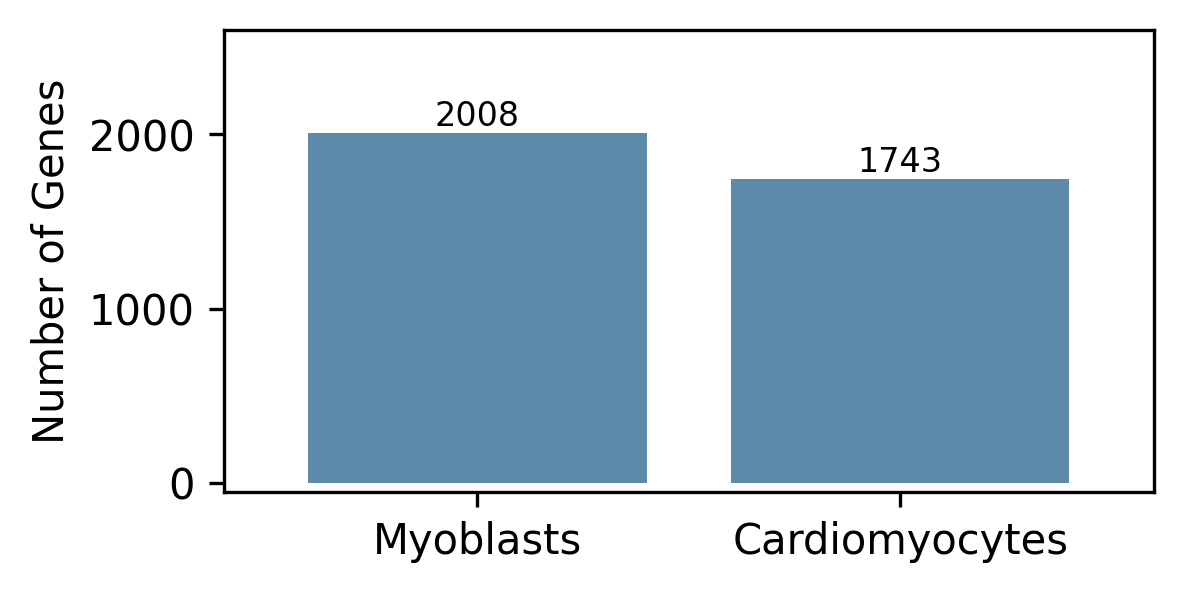

In [15]:
# number of genes included
nr = 1
nc = 1
ss_nr = 2
ss_nc = 4
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr, nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.0)
ax = plt.subplot(gs[0, 0])

num_genes = []
for t in tl:
    num_genes.append(len(genes_dict[t]))
ax.bar(tn, num_genes, color=lightblue)
ax.set_ylim(-50, 2600)
ax.set_xlim(-0.6, 1.6)
# ax.set_yticks([0,1000,2000,3000], [0,1000,2000,3000])
for i in range(len(tl)):
    plt.text(tn[i], num_genes[i], str(num_genes[i]), ha='center', va='bottom', fontsize=8)
ax.set_ylabel('Number of Genes')  

Text(0, 0.5, 'Number of Cells')

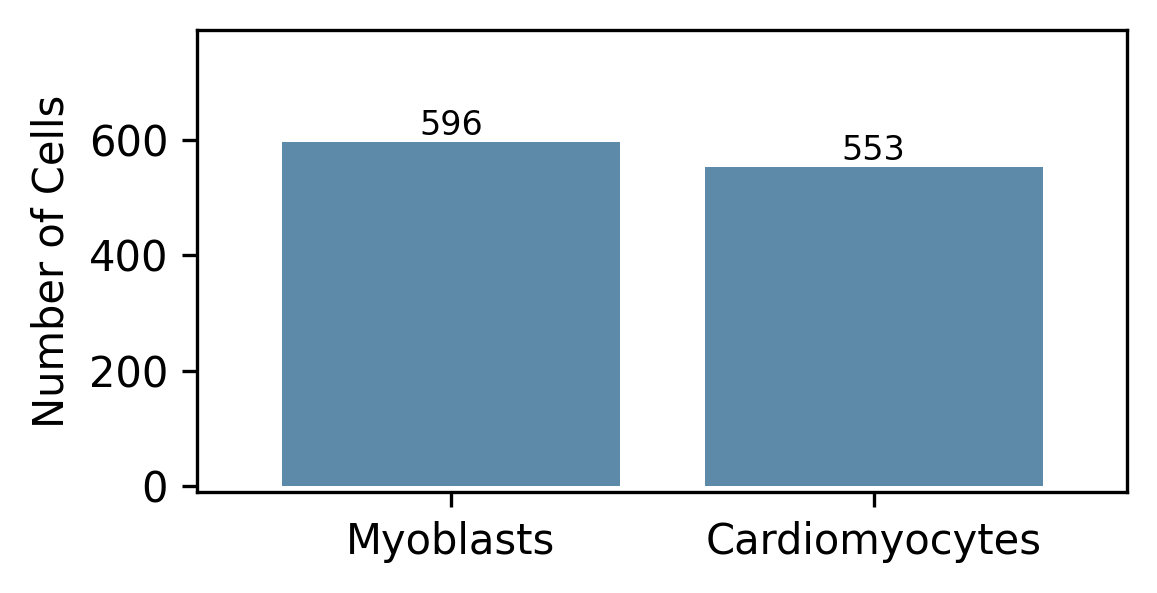

In [18]:
# number of cells
nr = 1
nc = 1
ss_nr = 2
ss_nc = 4
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr, nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.0)
ax = plt.subplot(gs[0, 0])

num_cells = []
for t in tl:
    num_cells.append(len(cells_dict[t]))
ax.bar(tn, num_cells, color=lightblue)
ax.set_ylim(-10, 790)
ax.set_xlim(-0.6, 1.6)
for i in range(len(tl)):
    plt.text(tn[i], num_cells[i], str(num_cells[i]), ha='center', va='bottom', fontsize=8)
ax.set_ylabel('Number of Cells')  

Text(0, 0.5, 'Number of Genes')

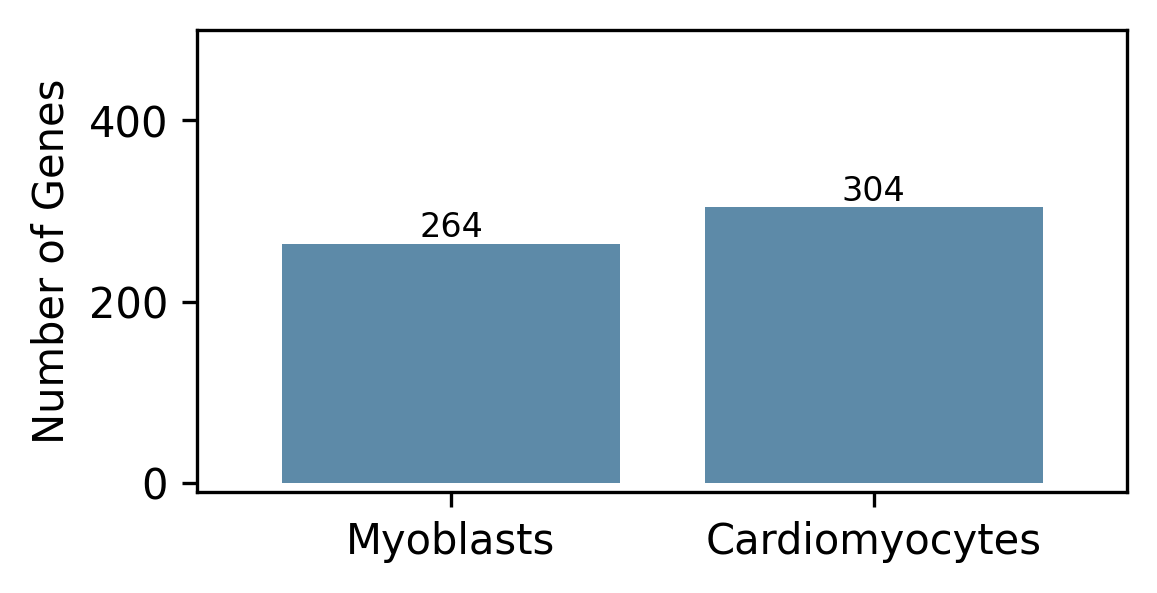

In [17]:
# number of sig genes
nr = 1
nc = 1
ss_nr = 2
ss_nc = 4
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr, nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.0)
ax = plt.subplot(gs[0, 0])

num_sig = []
for t in tl:
    num_sig.append(np.sum(p_fdr_dict[t]<=0.05))
ax.bar(tn, num_sig, color=lightblue)
ax.set_ylim(-10, 500)
ax.set_xlim(-0.6, 1.6)
for i in range(len(tl)):
    plt.text(tn[i], num_sig[i], str(num_sig[i]), ha='center', va='bottom', fontsize=8)
ax.set_ylabel('Number of Genes')  

#### beta kernels

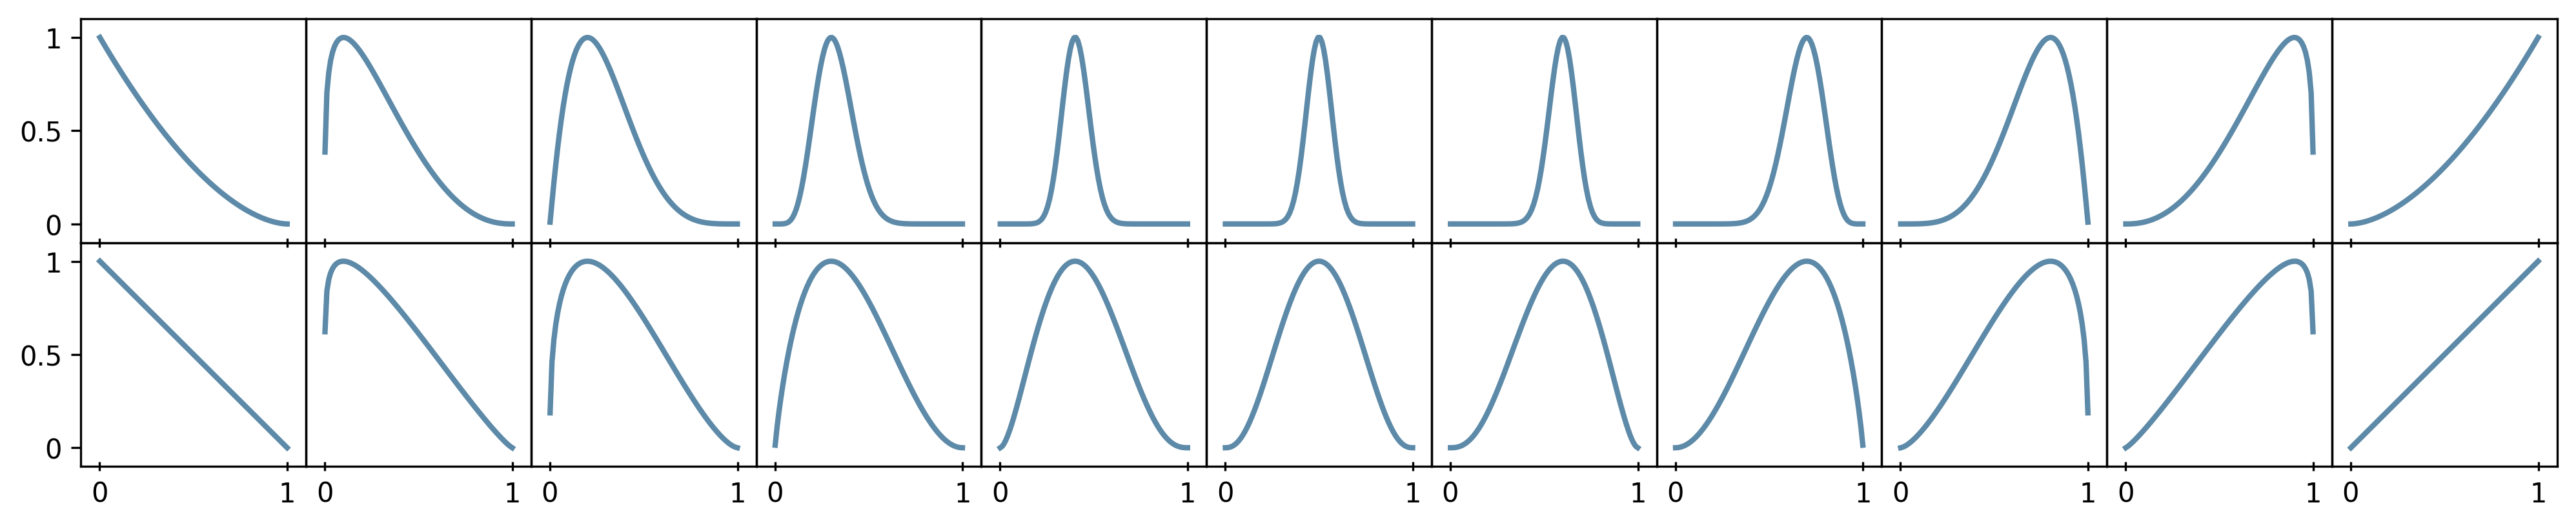

In [8]:
nr = 2
nc = 11
ss_nr = 1.5
ss_nc = 1.5
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr, nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.0)

x = np.linspace(0.001, 0.999, 100)
for i, [a0, b0] in enumerate(kernels_list):
    ax = plt.subplot(gs[i//nc, i%nc])
    y = beta.pdf(x, a0, b0)
    y_std = (y-np.min(y))/(np.max(y)-np.min(y))
    ax.plot(x, y_std, linewidth=2, alpha=1, color=lightblue)
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)
    ax.set_xticks([0,1], [0,1])
    ax.set_yticks([0,0.5,1], [0,0.5,1])
    if i//nc==0: ax.set_xticks([0,1], ['',''])
    if i%nc !=0: ax.set_yticks([])
    ax.tick_params(axis='x', direction='inout')

#### all cell types together

In [19]:
# merge labels
labels_all = np.concatenate(list(label_dict.values()))
labels_cluster, labels_num = np.unique(labels_all, return_counts=True)
print(labels_cluster)
print(labels_num)

[-1  0  1  2  3  4]
[3183   56  257   89   88   78]


In [20]:
# common genes
genes_all = np.concatenate(list(genes_dict.values()))
genes_all_sig = genes_all[labels_all>-1]

# genes sig in >=2 types
unique_genes, counts = np.unique(genes_all_sig, return_counts=True)
duplicate_genes = unique_genes[counts >= 2]
print(len(duplicate_genes))

89


In [21]:
# find TF in duplicate_elements
fn = 'input/Browse Transcription Factors mm9 - resource_browser.csv'
tab = pd.read_csv(fn)
tf_list = tab.Symbol.unique().tolist()
print(f'total #TF {len(tf_list)}')

list1_lower = [item.lower() for item in tf_list]
list2_lower = [item.lower() for item in duplicate_genes]
common_genes = set(list1_lower).intersection(set(list2_lower))
print(len(common_genes))
print(common_genes)

total #TF 1385
12
{'sox6', 'cux1', 'zfp521', 'rere', 'camta1', 'tcf12', 'mllt10', 'nfia', 'ncoa1', 'jarid2', 'foxp1', 'rora'}


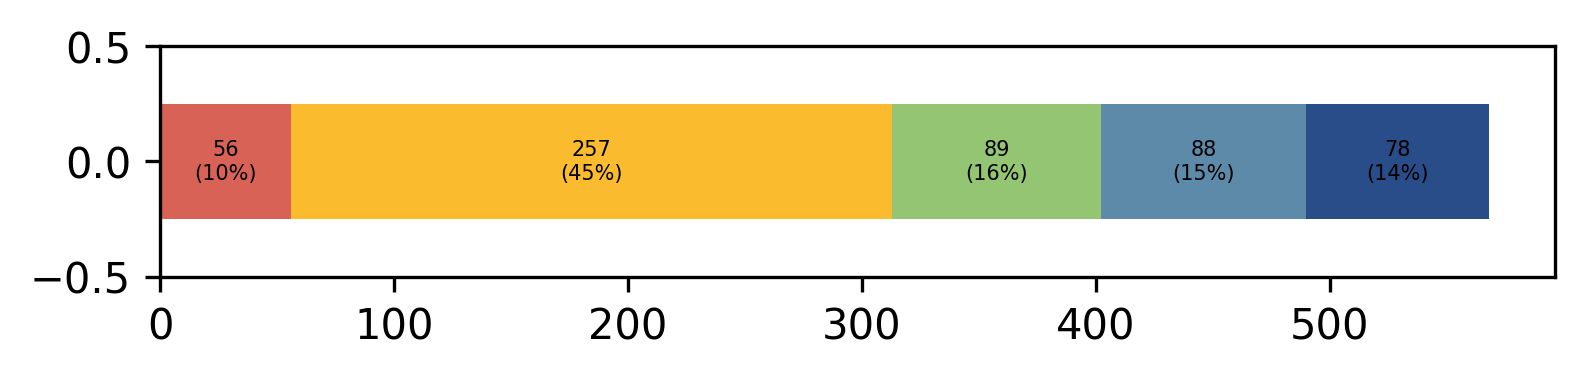

In [81]:
# barplot number of genes
bar_width = 0.5
bar_positions = [0, 1]
colors = [red, lightorange, lightgreen, lightblue, darkblue]

nr = 1
nc = 1
ss_nr = 1
ss_nc = 6
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr, nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.0)
ax = plt.subplot(gs[0, 0])

# sig genes
labels_num_sig = labels_num[1:]
left = 0
for i in range(5):
    ax.barh(bar_positions[0], labels_num_sig[i], bar_width, left=left, color=colors[i])
    left += labels_num_sig[i]
    ax.text(left - labels_num_sig[i]/2, bar_positions[0], f'{labels_num_sig[i]}\n({labels_num_sig[i]/np.sum(labels_num_sig)*100:.0f}%)', fontsize=5, ha='center', va='center', color='black')

ax.set_ylim(-0.5, 0.5)

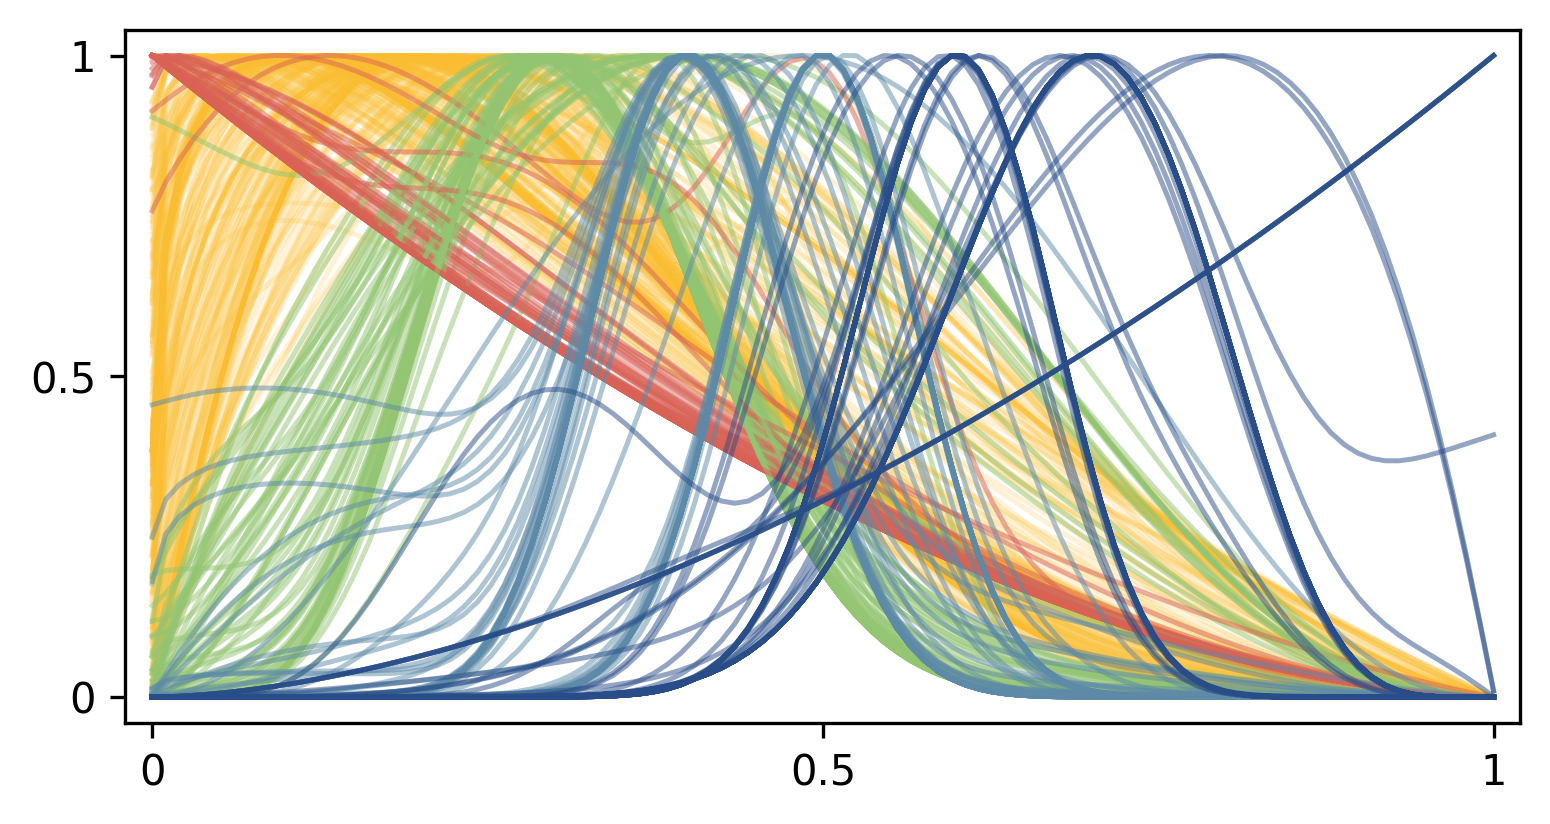

In [85]:
# lam est
x = np.linspace(0, 1, 100)
colors = [red, lightorange, lightgreen, lightblue, darkblue]

nr = 1
nc = 1
ss_nc = 6
ss_nr = 3
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr,nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.0)
ax = plt.subplot(gs[0, 0])

for t in types_list:
    label_t = label_dict[t]
    lam_t = lam_dict[t]
    gene_t = genes_dict[t]
    for j in range(len(gene_t)):
        l = label_t[j]
        if l>-1:
            color = colors[l]
            if color==darkblue: 
                zorder=4
                alpha=0.5
            elif color==lightgreen: 
                zorder=2
                alpha=0.5
            elif color==lightblue:
                zorder=3
                alpha=0.5
            elif color==red:
                zorder=2
                alpha=0.5
            else: 
                zorder=1
                alpha=0.2
            lam_j = lam_t[j]
            lam_std_j = (lam_j-np.min(lam_j))/(np.max(lam_j)-np.min(lam_j)) # min-max std
            ax.plot(x, lam_std_j, alpha=alpha, lw=1.2, color=color, zorder=zorder)

ax.set_xlim(-0.02, 1.02)
ax.set_ylim(-0.04, 1.04)
__ = ax.set_xticks([0,0.5,1], [0,0.5,1])
__ = ax.set_yticks([0,0.5,1], [0,0.5,1])

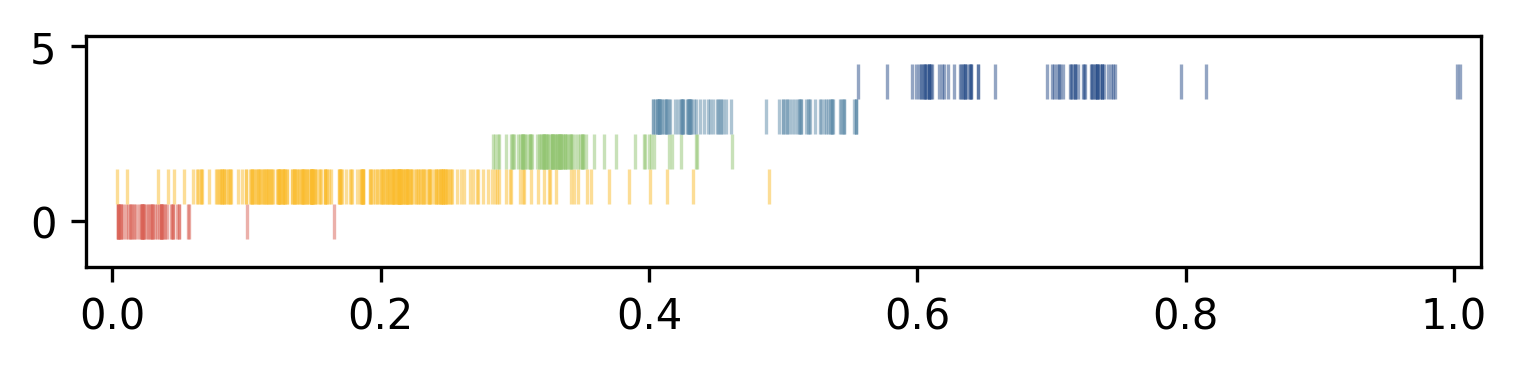

In [86]:
# pattern scores event plot
scores_all = np.concatenate(list(score_dict.values()))
scores_all_sig = scores_all[labels_all>-1]
labels_all_sig = labels_all[labels_all>-1]

colors = [red, lightorange, lightgreen, lightblue, darkblue]

nr = 1
nc = 1
ss_nc = 6
ss_nr = 1
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr,nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.0)
ax = plt.subplot(gs[0, 0])

alpha=0.5
ll=1
lw=0.8

for k in range(5):
    scores_k = scores_all_sig[labels_all_sig==k]
    ax.eventplot([scores_k + np.random.uniform(0, 0.05, len(scores_k))], 
                 orientation='horizontal', 
                 colors=[colors[k]],
                 alpha=alpha,
                 linelengths=ll, lw=lw, lineoffsets=k)

ax.set_xlim(-0.02, 1.02)

#### individual cell types

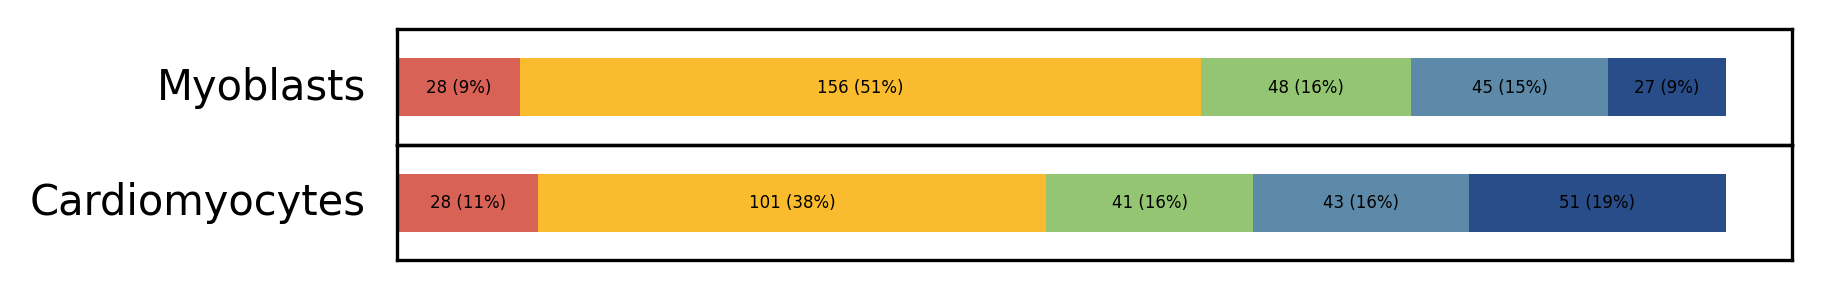

In [87]:
# barplot number of genes
bar_width = 0.5
bar_positions = [0, 1]
colors = [red, lightorange, lightgreen, lightblue, darkblue]

nr = 4
nc = 1
ss_nr = 0.5
ss_nc = 6
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr, nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.0)

for j, t in enumerate(types_list):
    ax = plt.subplot(gs[j, 0])
    
    labels_t = label_dict[t]
    labels_cluster_t, labels_num_t = np.unique(labels_t, return_counts=True)
    labels_num_sig_t = labels_num_t[1:]
    
    # sig genes
    left = 0
    for i in range(5):
        ax.barh(bar_positions[0], labels_num_sig_t[i], bar_width, left=left, color=colors[i])
        left += labels_num_sig_t[i]
        ax.text(left - labels_num_sig_t[i]/2, bar_positions[0], f'{labels_num_sig_t[i]} ({labels_num_sig_t[i]/np.sum(labels_num_sig_t)*100:.0f}%)', fontsize=4, ha='center', va='center', color='black')

    ax.set_ylim(-0.5, 0.5)
    if j!=3: ax.set_xticks([])
    ax.set_ylabel(tn[j], rotation=0, ha='right', va='center')  
    ax.set_yticks([])

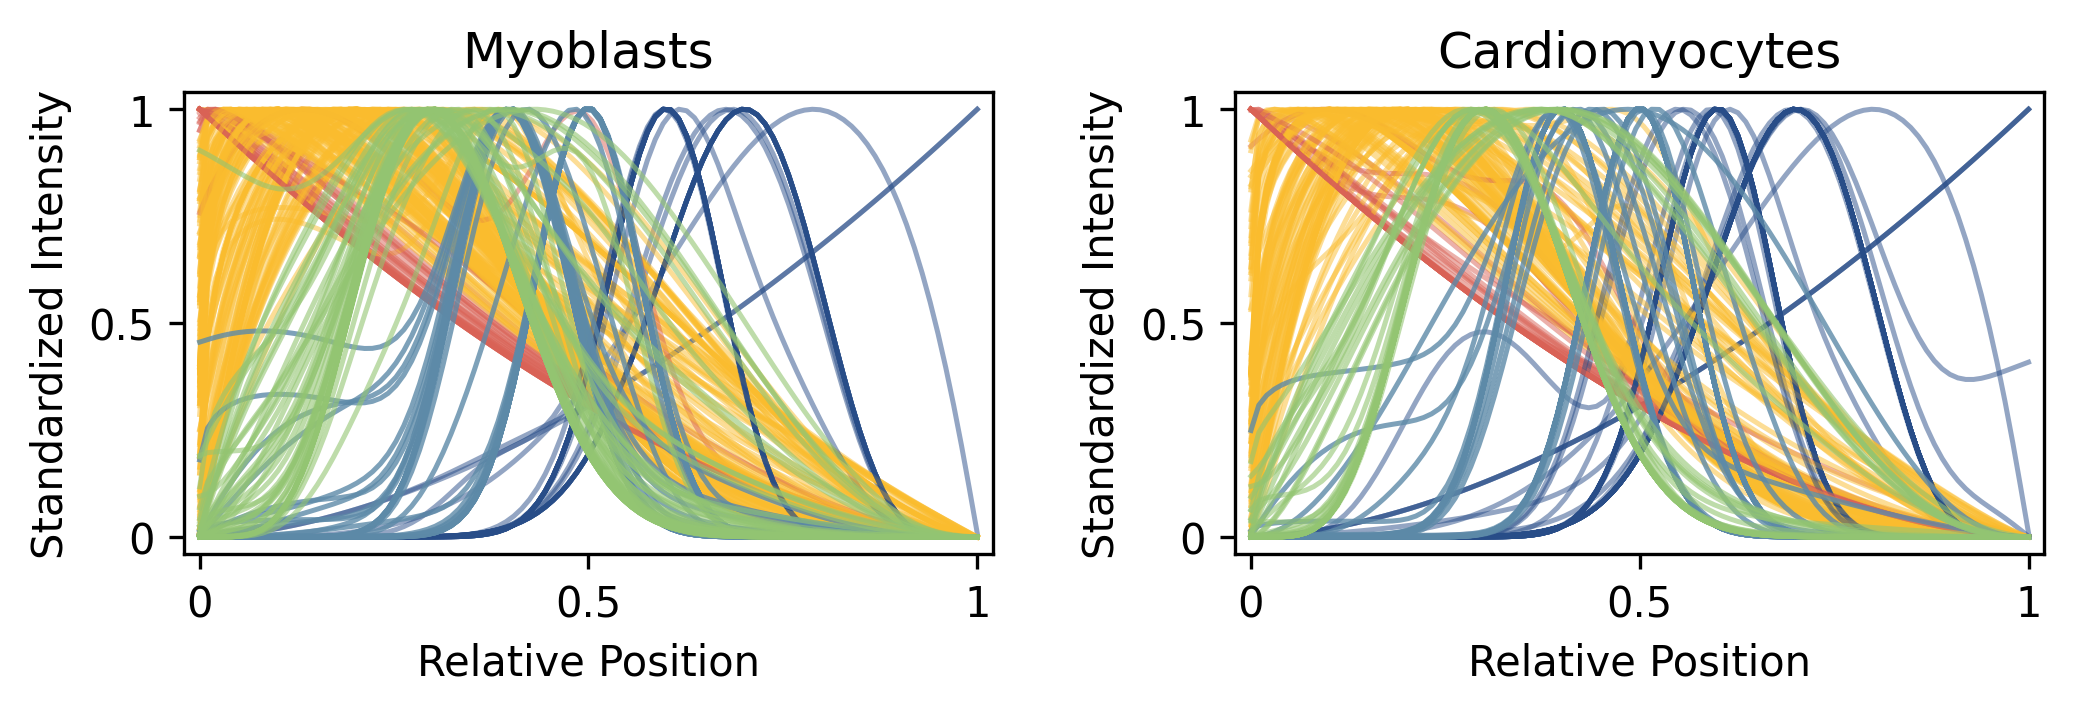

In [55]:
# lam est
x = np.linspace(0, 1, 100)
colors = [red, lightorange, lightgreen, lightblue, darkblue]

nr = 1
nc = 2
ss_nc = 4
ss_nr = 2
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr,nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.3, hspace=0.0)

for i, t in enumerate(types_list):
    ax = plt.subplot(gs[0,i])
    
    label_t = label_dict[t]
    lam_t = lam_dict[t]
    gene_t = genes_dict[t]
    
    for j in range(len(gene_t)):
        l = label_t[j]
        if l>-1:
            color = colors[l]
            if color==darkorange: 
                zorder=4
                alpha=0.8
            elif color==lightgreen: 
                zorder=3
                alpha=0.6
            elif color==lightblue:
                zorder=2
                alpha=0.8
            else: 
                zorder=1
                alpha=0.5
            lam_j = lam_t[j]
            lam_std_j = (lam_j-np.min(lam_j))/(np.max(lam_j)-np.min(lam_j)) # min-max std
            ax.plot(x, lam_std_j, alpha=alpha, lw=1.2, color=color, zorder=zorder)

    ax.set_xlim(-0.02, 1.02)
    ax.set_ylim(-0.04, 1.04)
    __ = ax.set_xticks([0,0.5,1], [0,0.5,1])
    __ = ax.set_yticks([0,0.5,1], [0,0.5,1])
    
    ax.set_title(tn[i])    
    ax.set_ylabel('Standardized Intensity')
    ax.set_xlabel('Relative Position')

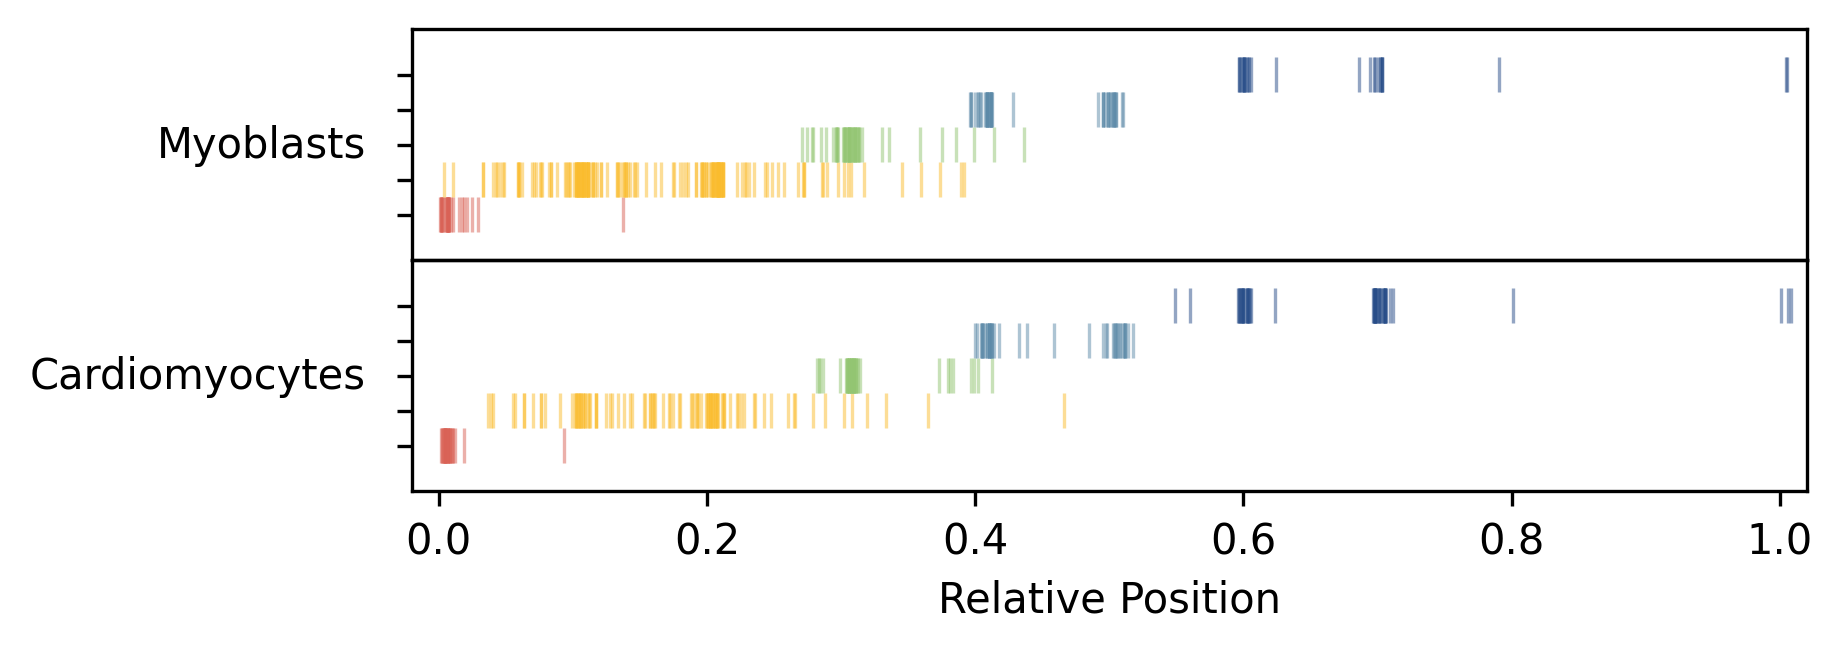

In [88]:
# pattern scores event plot
scores_all = np.concatenate(list(score_dict.values()))
scores_all_sig = scores_all[labels_all>-1]
labels_all_sig = labels_all[labels_all>-1]

colors = [red, lightorange, lightgreen, lightblue, darkblue]

alpha=0.5
ll=1
lw=0.8

nr = 2
nc = 1
ss_nc = 6
ss_nr = 1
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr,nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.0)

for j, t in enumerate(types_list):
    ax = plt.subplot(gs[j, 0])
    
    labels_t = label_dict[t]
    scores_t = score_dict[t]
    labels_sig_t = labels_t[labels_t>-1]
    scores_sig_t = scores_t[labels_t>-1]

    for k in range(5):
        scores_k = scores_sig_t[labels_sig_t==k]
        ax.eventplot([scores_k + np.random.uniform(0, 0.01, len(scores_k))], 
                     orientation='horizontal', 
                     colors=[colors[k]],
                     alpha=alpha,
                     linelengths=ll, lw=lw, lineoffsets=k)

    ax.set_xlim(-0.02, 1.02)
    if j<1: ax.set_xticks([])
    else: ax.set_xlabel('Relative Position')
    __ = ax.set_yticks([0,1,2,3,4], ['']*5)
    ax.set_ylabel(tn[j], ha='right', va='center', rotation=0)

#### compare details in 1 (Cardiomyocyte) and 20 (Myoblast)

In [58]:
# cluster 1 and 20 genes
t = '1'
genes_t = genes_dict[t]
labels_t = label_dict[t]
genes_c1 = np.array(genes_t)[labels_t==0]
print(f'type {t}')
print(f'# of nuclear genes={len(genes_c1)}')
print(genes_c1)

t = '20'
genes_t = genes_dict[t]
labels_t = label_dict[t]
genes_c1 = np.array(genes_t)[labels_t==0]
print(f'type {t}')
print(f'# of nuclear genes={len(genes_c1)}')
print(genes_c1)

type 1
# of nuclear genes=28
['Dmd' 'Trim55' 'Lmo7' 'Msi2' 'Esrrg' 'Enah' 'Pbx1' 'Tmcc1' 'Gpc3' 'Tcf12'
 'Cux1' 'Exoc4' 'Efna5' 'Zfr' 'Osbpl8' 'Col4a1' 'Myh7b' 'Fto' 'Zeb2'
 'Tsix' 'Strip2' 'Cog5' 'Mical3' 'St7' 'Nfat5' 'Alpk3' 'Mdm4' 'Kif13a']
type 20
# of nuclear genes=28
['Malat1' 'Meg3' 'Palld' 'Dlg2' 'Macf1' 'Erbb4' 'Ptprd' 'Tcf12' 'Ryr1'
 'Cux1' 'Mcu' 'Zfp521' 'Tnik' 'Samd4' 'Akap13' 'Trim55' 'Pard3' 'Inpp4b'
 'Rb1' 'Tenm4' 'Sbf2' 'Fhit' 'Exoc6b' 'Chd7' 'Zfp638' 'Arid2' 'Dlc1'
 'Tnrc6c']


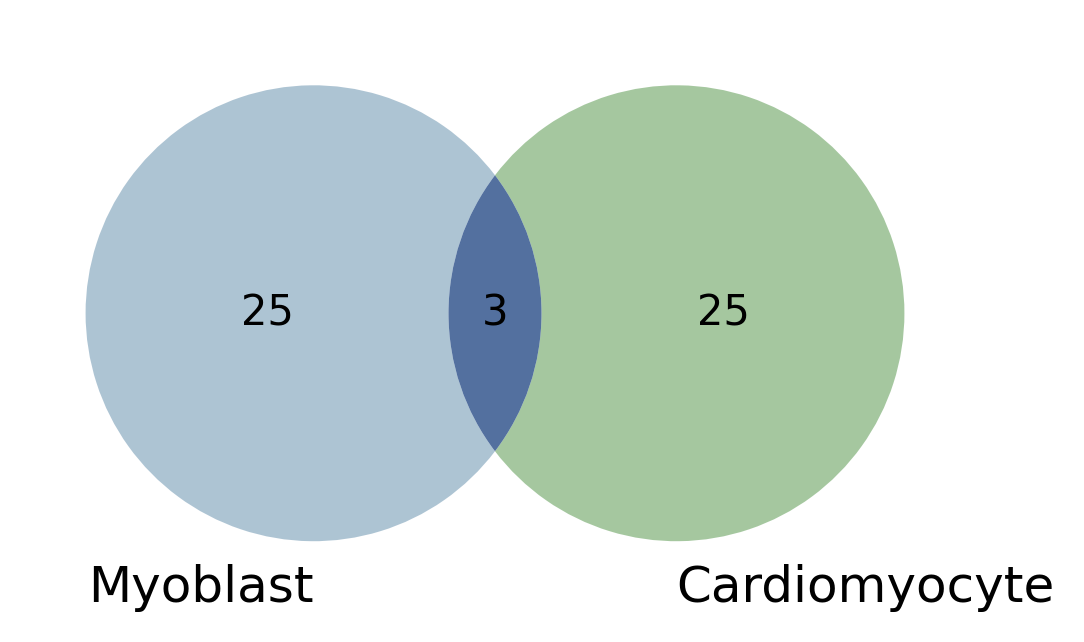

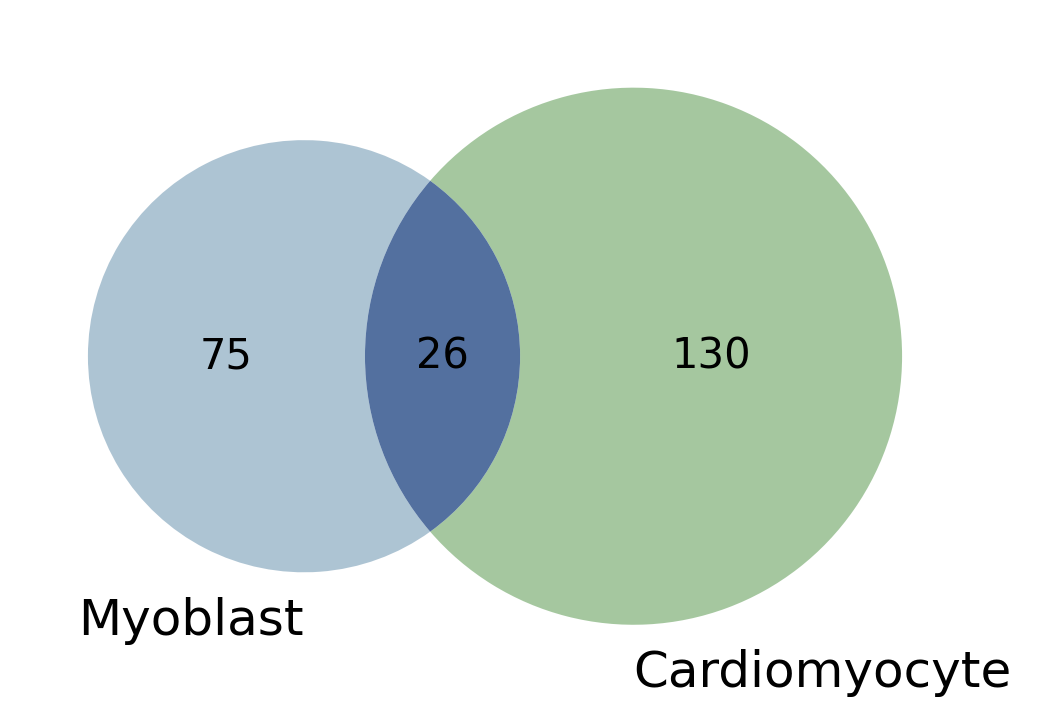

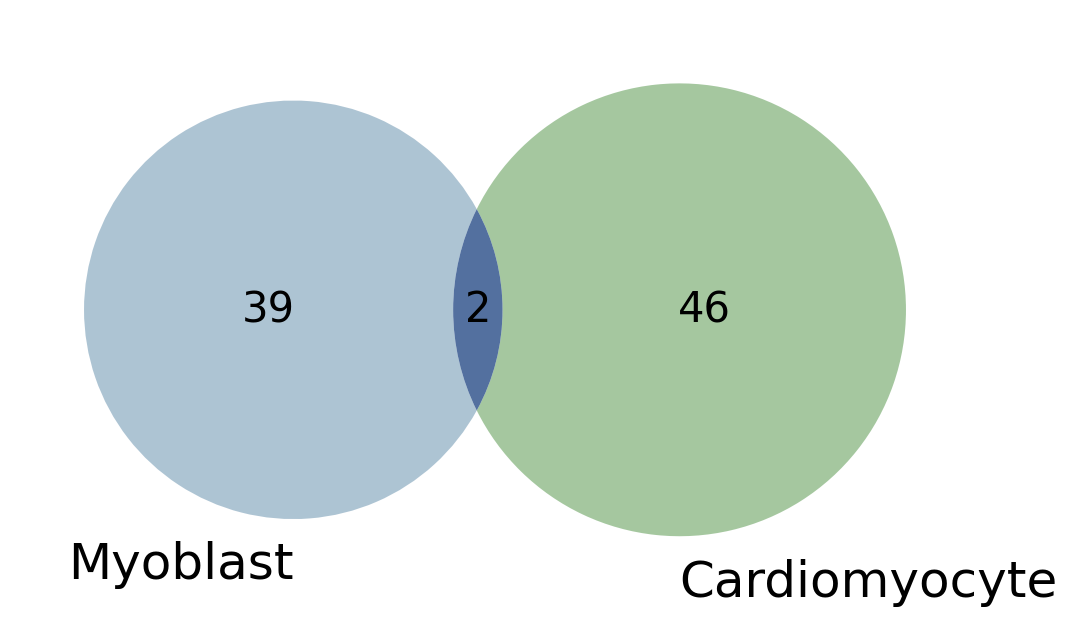

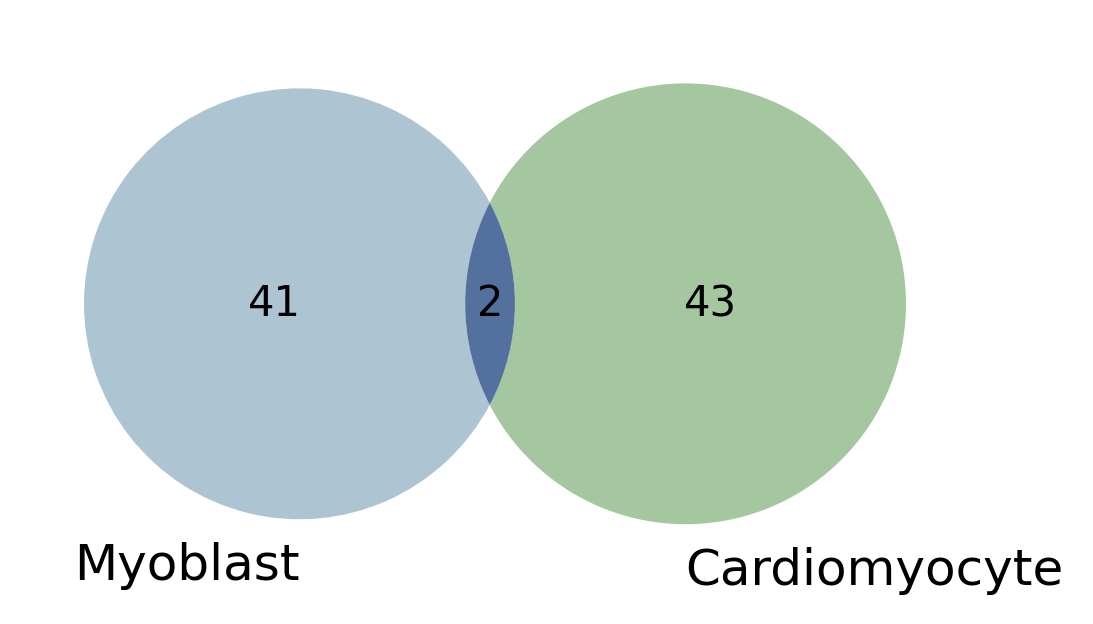

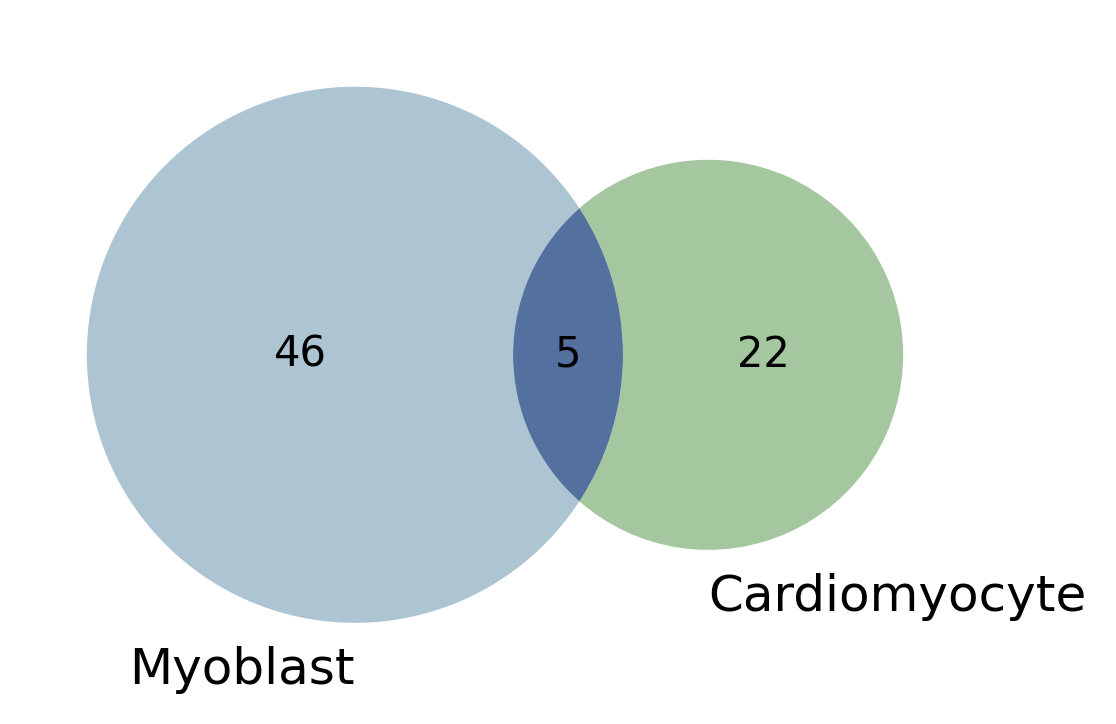

In [59]:
# venn plot

for k in range(5):

    plt.figure(figsize=(4,4), dpi=300) 

    set1 = set(np.array(genes_dict['20'])[label_dict['20']==k])
    set2 = set(np.array(genes_dict['1'])[label_dict['1']==k])

    only_set1 = len(set1 - set2) 
    only_set2 = len(set2 - set1) 
    set1_and_set2 = len(set1 & set2) 

    venn = venn2(subsets=(only_set1, only_set2, set1_and_set2), set_labels=('Myoblast', 'Cardiomyocyte'))

    venn.get_patch_by_id('10').set_color(lightblue)
    venn.get_patch_by_id('10').set_alpha(0.5) 
    venn.get_patch_by_id('01').set_color(darkgreen)
    venn.get_patch_by_id('01').set_alpha(0.5) 
    venn.get_patch_by_id('11').set_color(darkblue)
    venn.get_patch_by_id('11').set_alpha(0.8) 
    
    for patch in venn.patches:
        patch.set_linewidth(0)

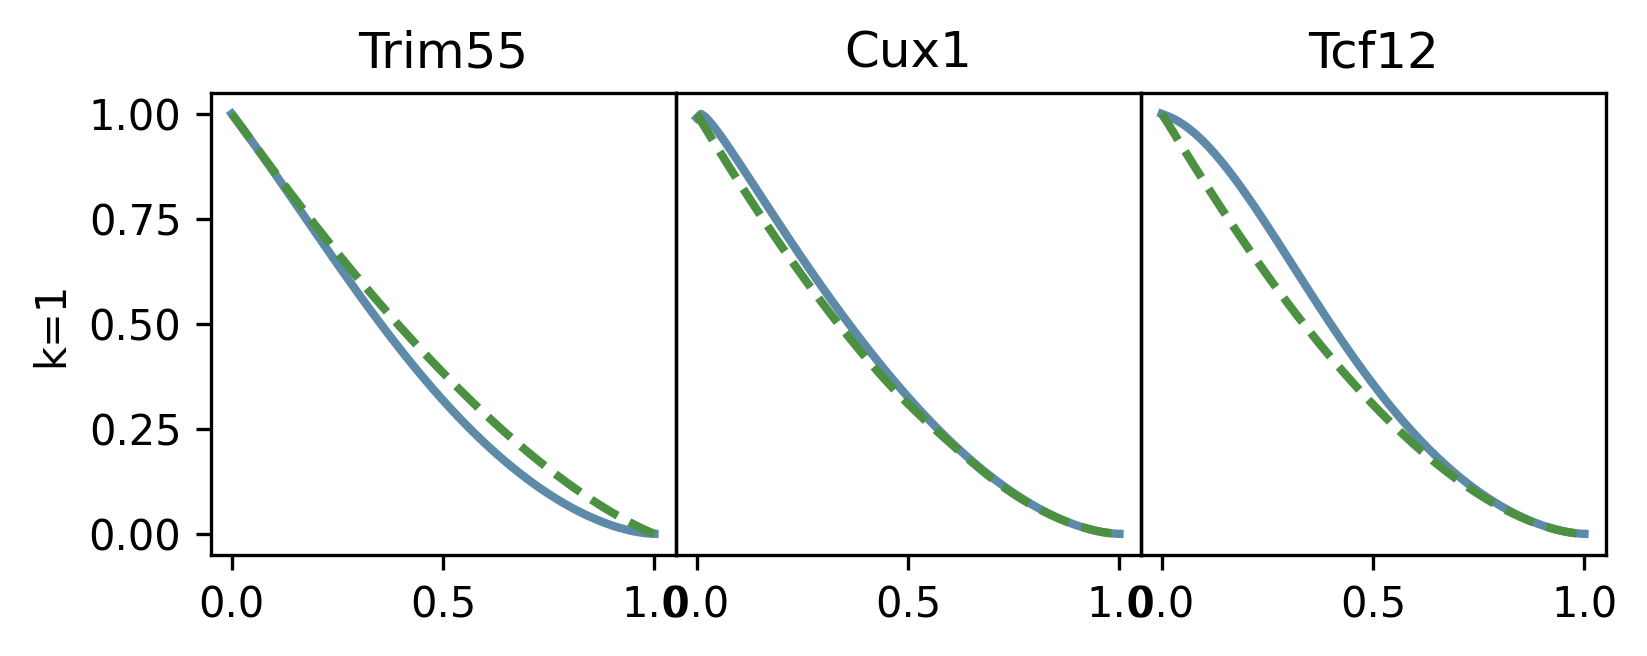

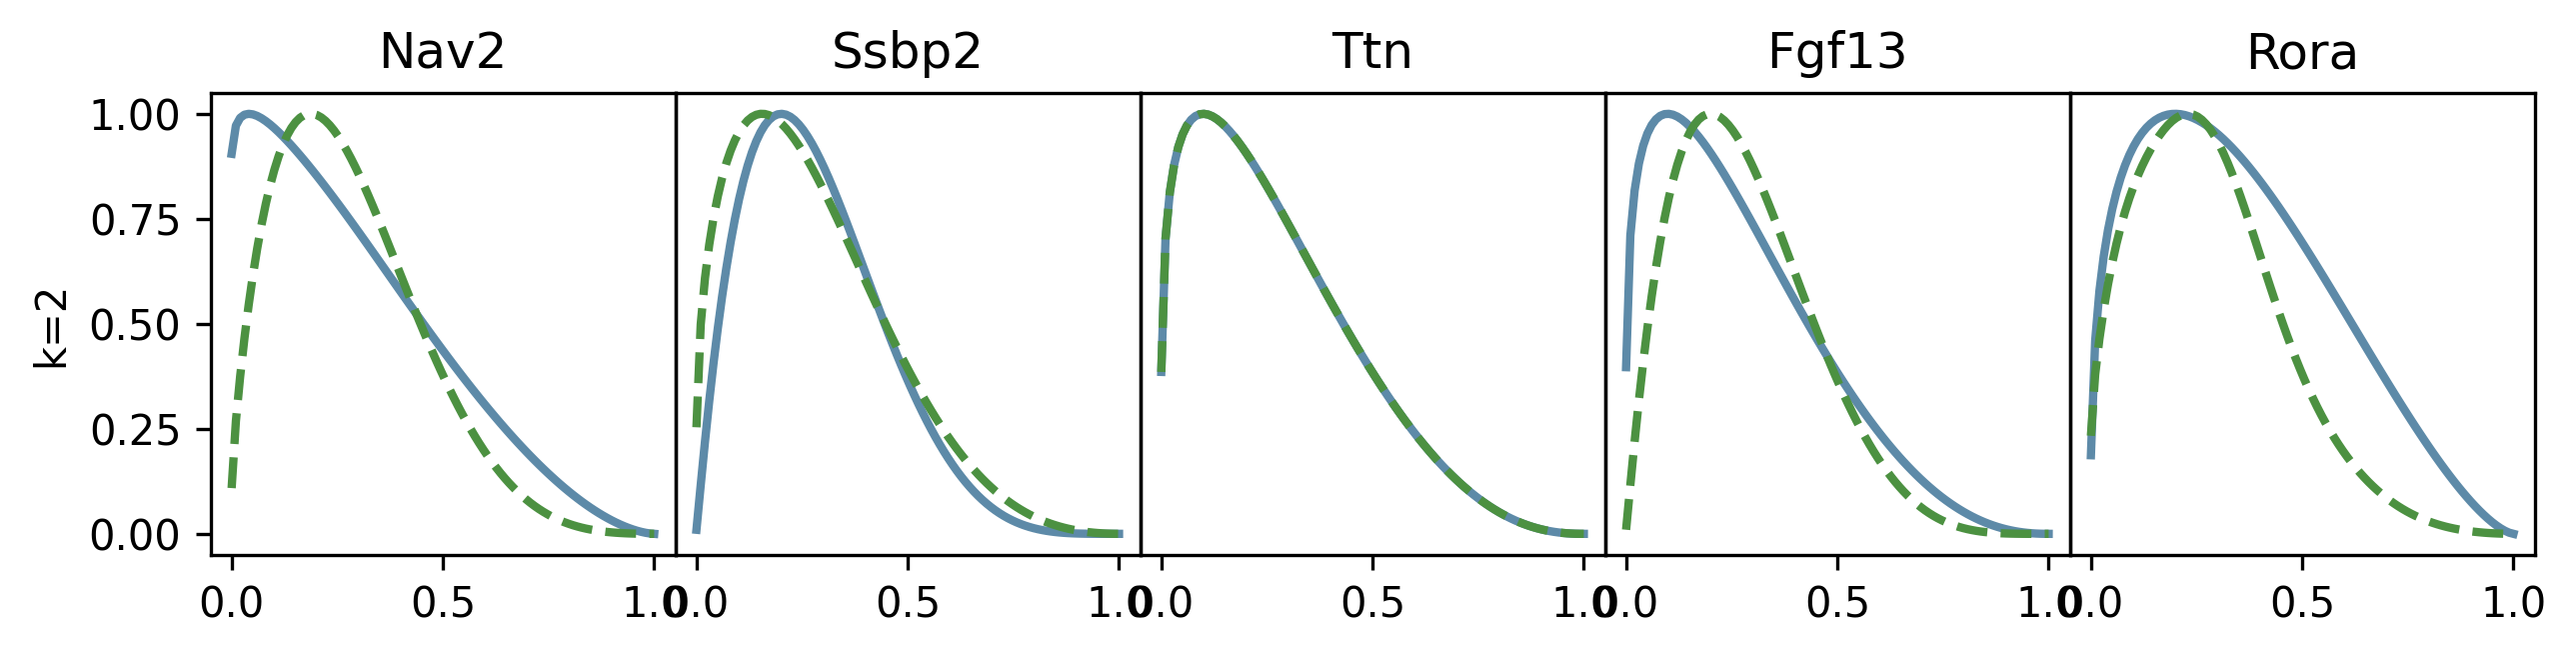

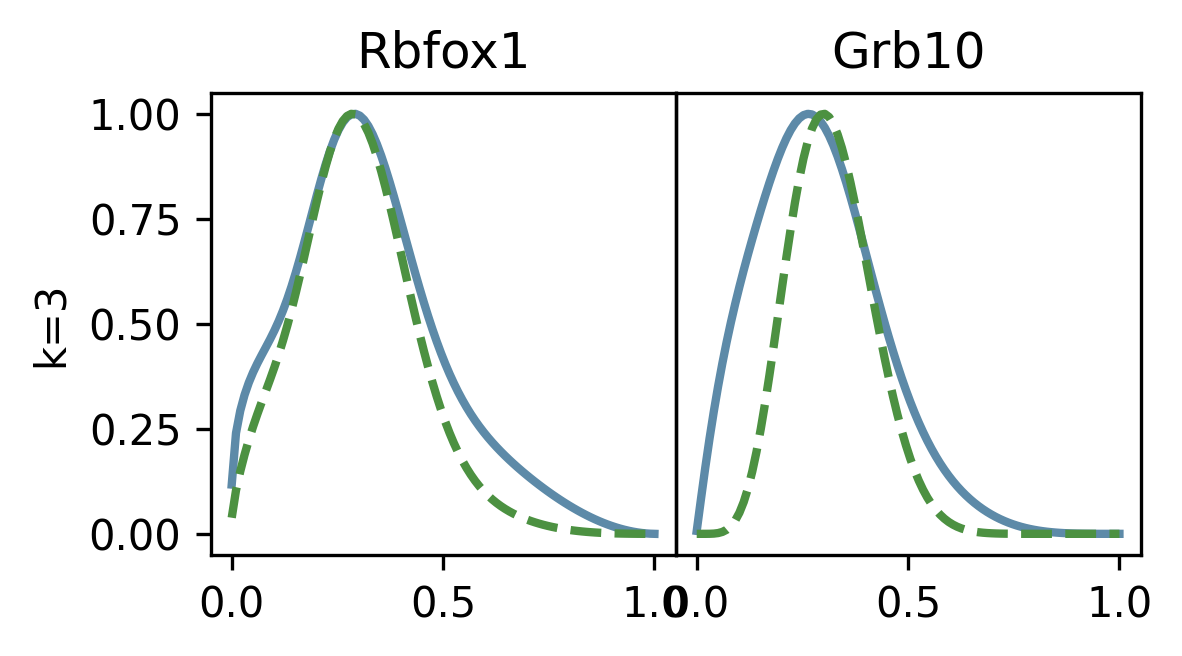

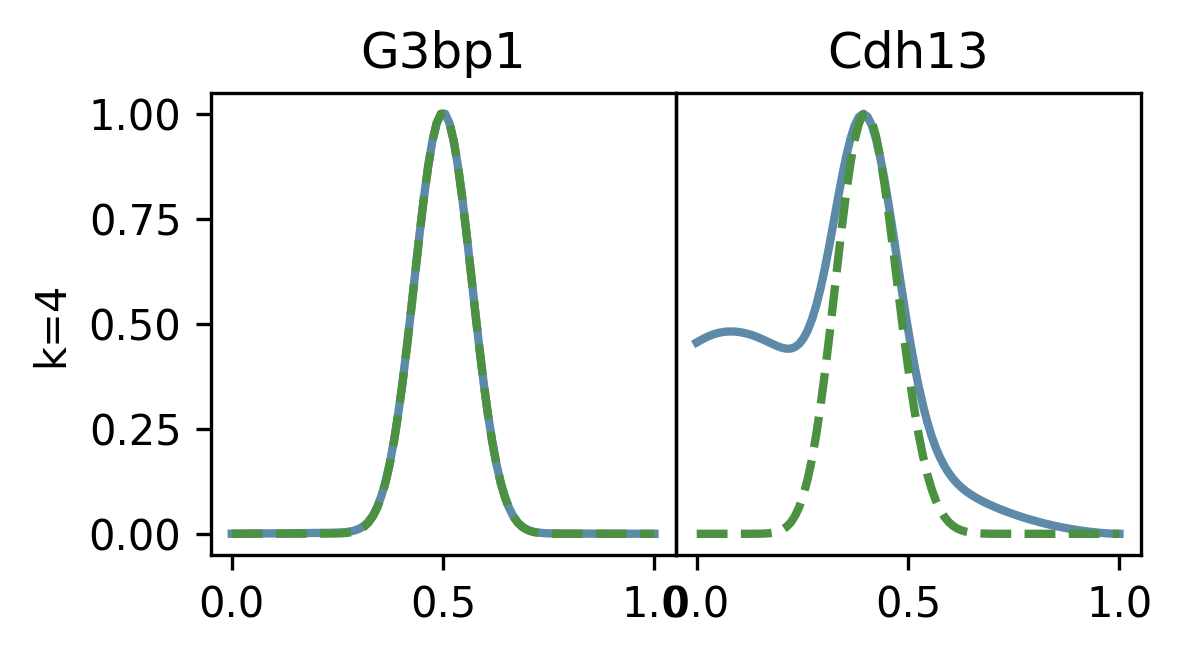

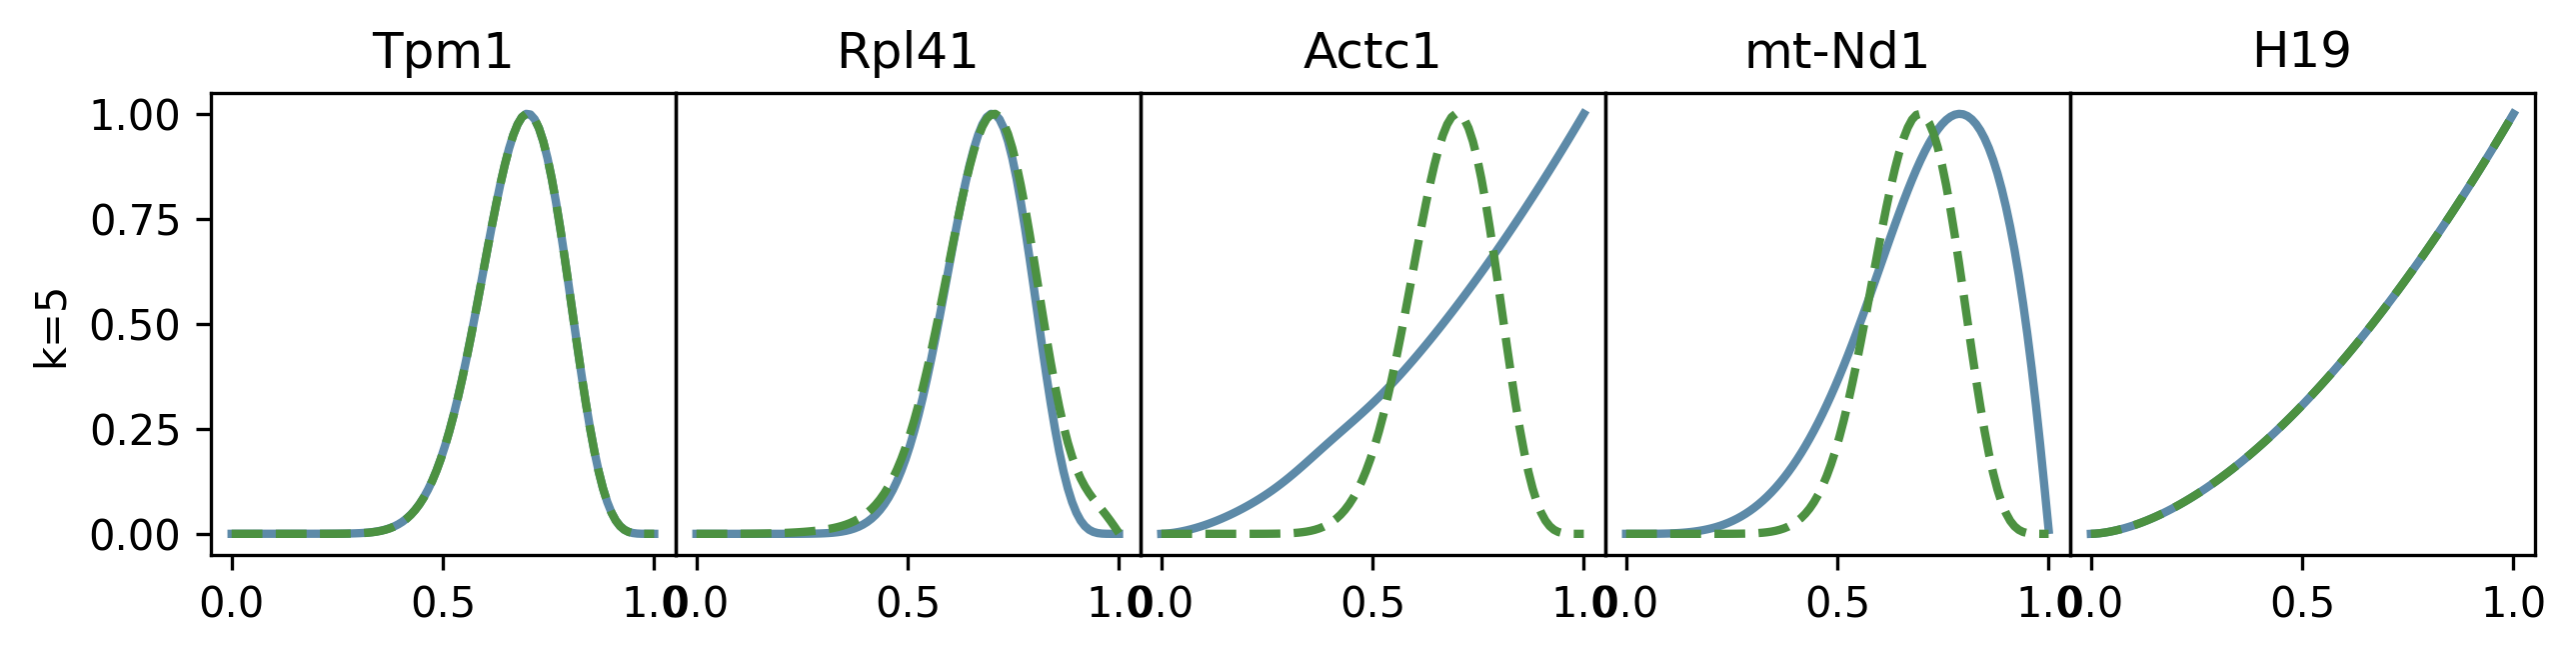

In [60]:
# plot lam of common genes
for k in range(5):
    set1 = set(np.array(genes_dict['20'])[label_dict['20']==k])
    set2 = set(np.array(genes_dict['1'])[label_dict['1']==k])
    only_set1 = len(set1 - set2) 
    only_set2 = len(set2 - set1) 
    set1_and_set2 = len(set1 & set2) 
    
    nc = 5
    nr = int(np.ceil(set1_and_set2/nc))
    ss_nc = 2
    ss_nr = 2
    fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
    gs = fig.add_gridspec(nr,nc,
                          width_ratios=[1]*nc,
                          height_ratios=[1]*nr)
    gs.update(wspace=0.0, hspace=0.0)
    
    gl = list(set1 & set2)[:5]
    for i, g in enumerate(gl):
        ax = plt.subplot(gs[i//nc, i%nc])
        t = '1'
        ig = np.where(genes_dict[t]==g)[0][0]
        lam = lam_dict[t][ig]
        x = np.linspace(0,1,100)
        y = (lam-np.min(lam))/(np.max(lam)-np.min(lam))
        ax.plot(x,y, color=lightblue, lw=2)
        t = '20'
        ig = np.where(genes_dict[t]==g)[0][0]
        lam = lam_dict[t][ig]
        x = np.linspace(0,1,100)
        y = (lam-np.min(lam))/(np.max(lam)-np.min(lam))
        ax.plot(x,y, color=darkgreen, linestyle='dashed', lw=2)
        ax.set_title(g)
        if i==0: ax.set_ylabel(f'k={k+1}')
        if i%nc !=0: ax.set_yticks([])

In [90]:
# lnc genes
def parse_gencode_annotation(annotation_file):
    lnc_genes = set()
    with open(annotation_file, 'r') as f:
        for line in f:
            if line.startswith('#'):
                continue
            fields = line.strip().split('\t') 
            if fields[2] == 'gene' and ' gene_type "lncRNA"' in fields[8].split(';'):
                gene_name = fields[8].split(';')[2].split('"')[1]  # Extract gene name
                lnc_genes.add(gene_name)
    return lnc_genes

def check_if_lnc(genes_list, labels_list, lnc_genes):
    lnc_genes_in_list = [gene for gene in genes_list if gene in lnc_genes]
    lnc_genes_labels = [labels_list[ig] for ig, gene in enumerate(genes_list) if gene in lnc_genes]
    return lnc_genes_in_list, lnc_genes_labels

annotation_file = 'input/gencode.vM34.annotation.gtf'
lnc_genes = parse_gencode_annotation(annotation_file)

for t in types_list:
    genes_list = np.array(genes_dict[t])[p_fdr_dict[t]<=0.05]
    labels_list = np.array(label_dict[t])[p_fdr_dict[t]<=0.05]
    lnc_genes_in_list, lnc_genes_labels = check_if_lnc(genes_list, labels_list, lnc_genes)
    print(f'{t} #lnc={len(lnc_genes_in_list)}\n{lnc_genes_in_list}\nlabels:{lnc_genes_labels}')

1 #lnc=7
['Malat1', 'H19', 'Meg3', 'Airn', 'Kcnq1ot1', 'Xist', 'Tsix']
labels:[1, 4, 1, 1, 1, 1, 0]
20 #lnc=12
['Malat1', 'H19', 'Meg3', 'Gm19951', 'Mirg', 'Kcnq1ot1', 'Airn', 'Xist', 'Tsix', 'B830012L14Rik', 'Arhgap26', '5430431A17Rik']
labels:[0, 4, 0, 4, 1, 1, 1, 1, 3, 1, 1, 4]


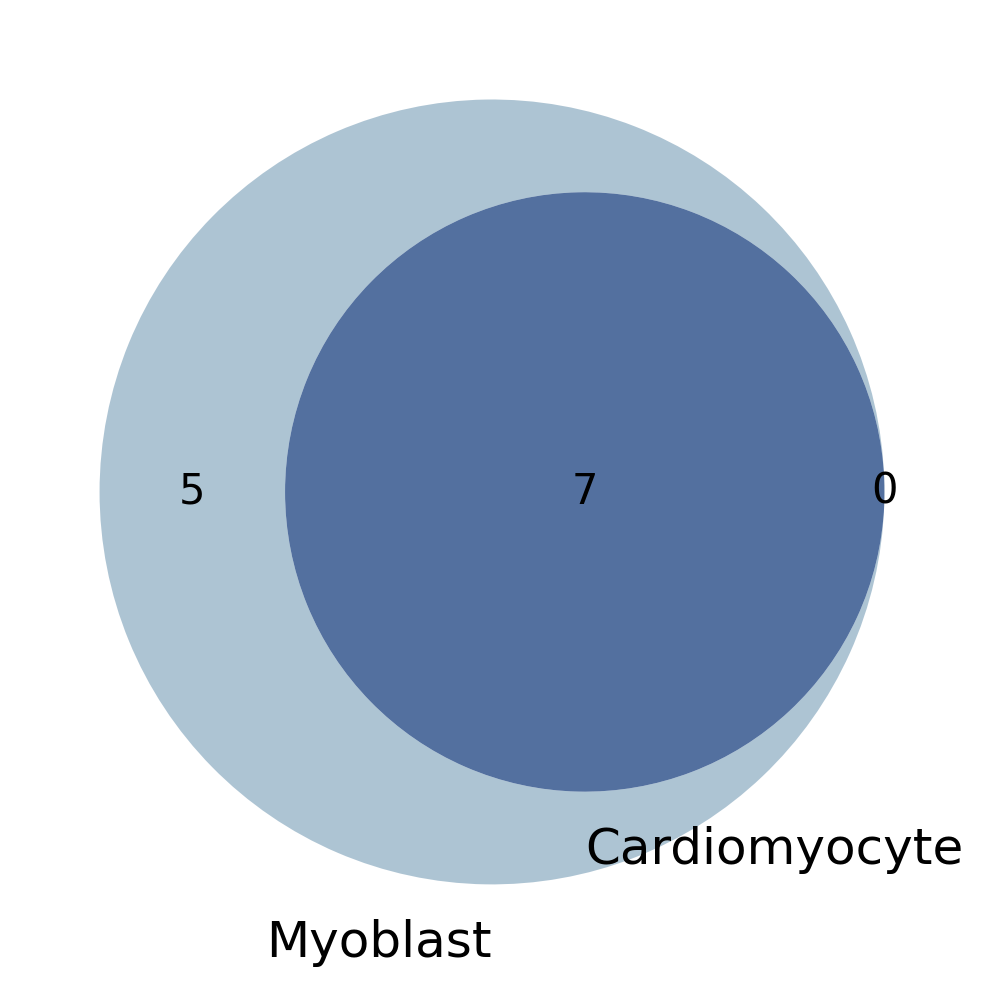

In [91]:
# common lnc genes
t = '1'
genes_list = np.array(genes_dict[t])[p_fdr_dict[t]<=0.05]
labels_list = np.array(label_dict[t])[p_fdr_dict[t]<=0.05]
lnc_genes_in_list_t1, lnc_genes_labels_t1 = check_if_lnc(genes_list, labels_list, lnc_genes)
t = '20'
genes_list = np.array(genes_dict[t])[p_fdr_dict[t]<=0.05]
labels_list = np.array(label_dict[t])[p_fdr_dict[t]<=0.05]
lnc_genes_in_list_t20, lnc_genes_labels_t20 = check_if_lnc(genes_list, labels_list, lnc_genes)

# venn plot
plt.figure(figsize=(4,4), dpi=300) 

set1 = set(lnc_genes_in_list_t1)
set2 = set(lnc_genes_in_list_t20)

only_set2 = len(set1 - set2) 
only_set1 = len(set2 - set1) 
set1_and_set2 = len(set1 & set2) 

venn = venn2(subsets=(only_set1, only_set2, set1_and_set2), set_labels=('Myoblast', 'Cardiomyocyte'))

venn.get_patch_by_id('10').set_color(lightblue)
venn.get_patch_by_id('10').set_alpha(0.5) 
venn.get_patch_by_id('01').set_color(darkgreen)
venn.get_patch_by_id('01').set_alpha(0.5) 
venn.get_patch_by_id('11').set_color(darkblue)
venn.get_patch_by_id('11').set_alpha(0.8) 

for patch in venn.patches:
    patch.set_linewidth(0)

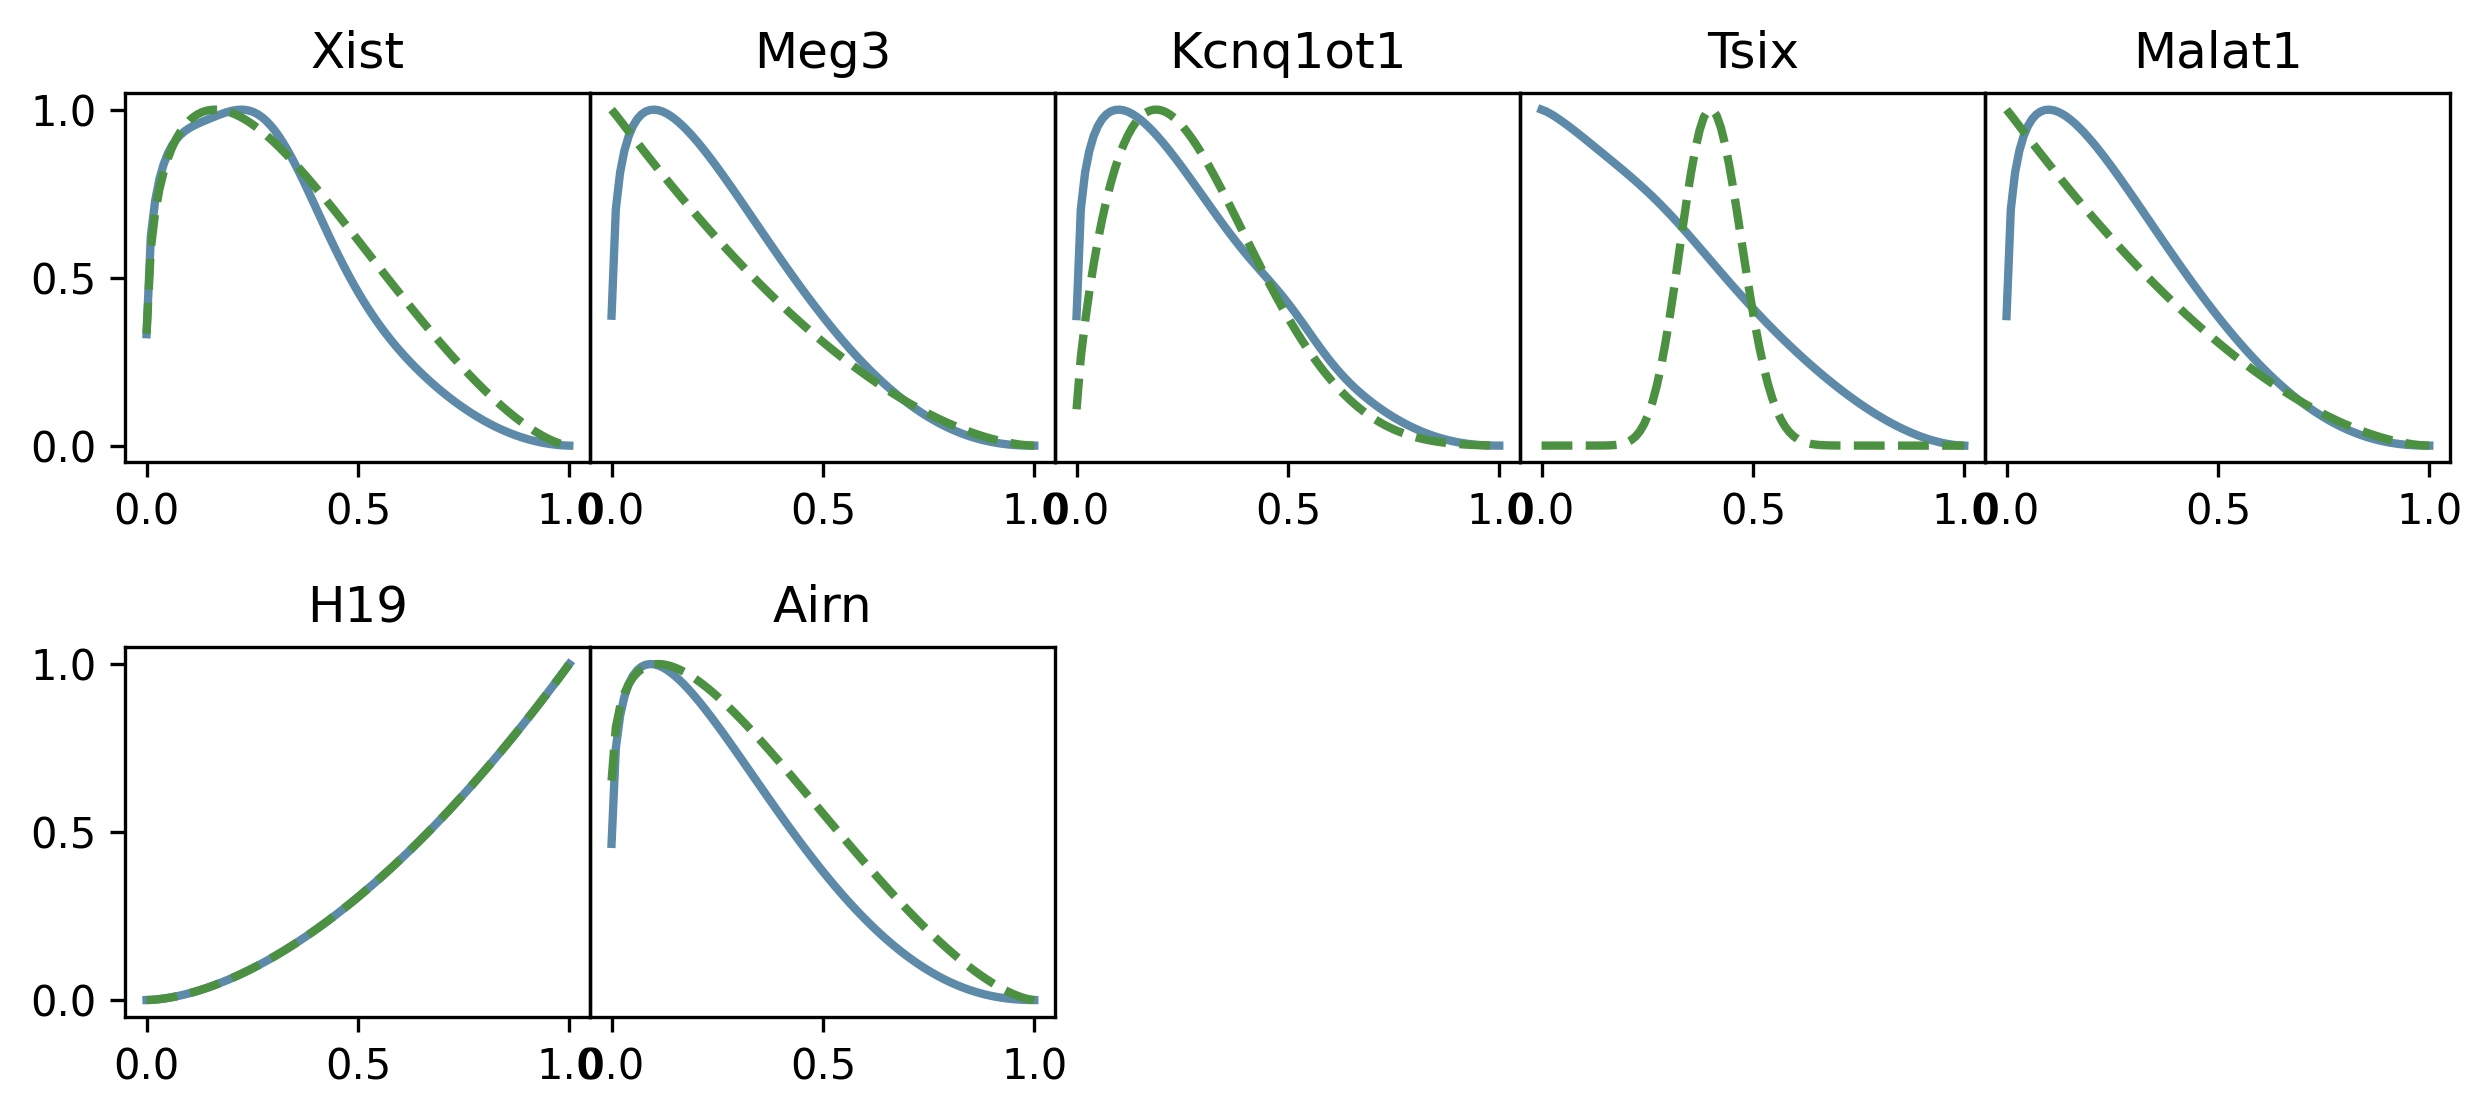

In [92]:
# lam of common lnc genes
gl_com = list(set1 & set2)

nc = 5
nr = int(np.ceil(len(gl_com)/nc))
ss_nc = 2
ss_nr = 2
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr,nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.5)

gl = gl_com
for i, g in enumerate(gl):
    ax = plt.subplot(gs[i//nc, i%nc])
    t = '1'
    ig = np.where(genes_dict[t]==g)[0][0]
    lam = lam_dict[t][ig]
    lab = label_dict[t][ig]
    x = np.linspace(0,1,100)
    y = (lam-np.min(lam))/(np.max(lam)-np.min(lam))
    ax.plot(x,y, color=lightblue, lw=2)
    t = '20'
    ig = np.where(genes_dict[t]==g)[0][0]
    lam = lam_dict[t][ig]
    x = np.linspace(0,1,100)
    y = (lam-np.min(lam))/(np.max(lam)-np.min(lam))
    ax.plot(x,y, color=darkgreen, linestyle='dashed', lw=2)
    ax.set_title(f'{g}')
    if i%nc !=0: ax.set_yticks([])

In [111]:
# check mt genes
t = '1'
genes_t = genes_dict[t]
labels_t = label_dict[t]
mt_t1 = []
mt_label_t1 = []
for i, g in enumerate(genes_t):
    if g.startswith('mt-'):
        mt_t1.append(g)
        mt_label_t1.append(labels_t[i])
mt_sig_t1 = np.array(mt_t1)[np.array(mt_label_t1)!=-1]
print(f'#sig mt={len(mt_sig_t1)} {mt_sig_t1}')

t = '20'
genes_t = genes_dict[t]
labels_t = label_dict[t]
mt_t20 = []
mt_label_t20 = []
for i, g in enumerate(genes_t):
    if g.startswith('mt-'):
        mt_t20.append(g)
        mt_label_t20.append(labels_t[i])
mt_sig_t20 = np.array(mt_t20)[np.array(mt_label_t20)!=-1]
print(f'#sig mt={len(mt_sig_t20)} {mt_sig_t20}')

#sig mt=2 ['mt-Cytb' 'mt-Nd1']
#sig mt=1 ['mt-Nd1']


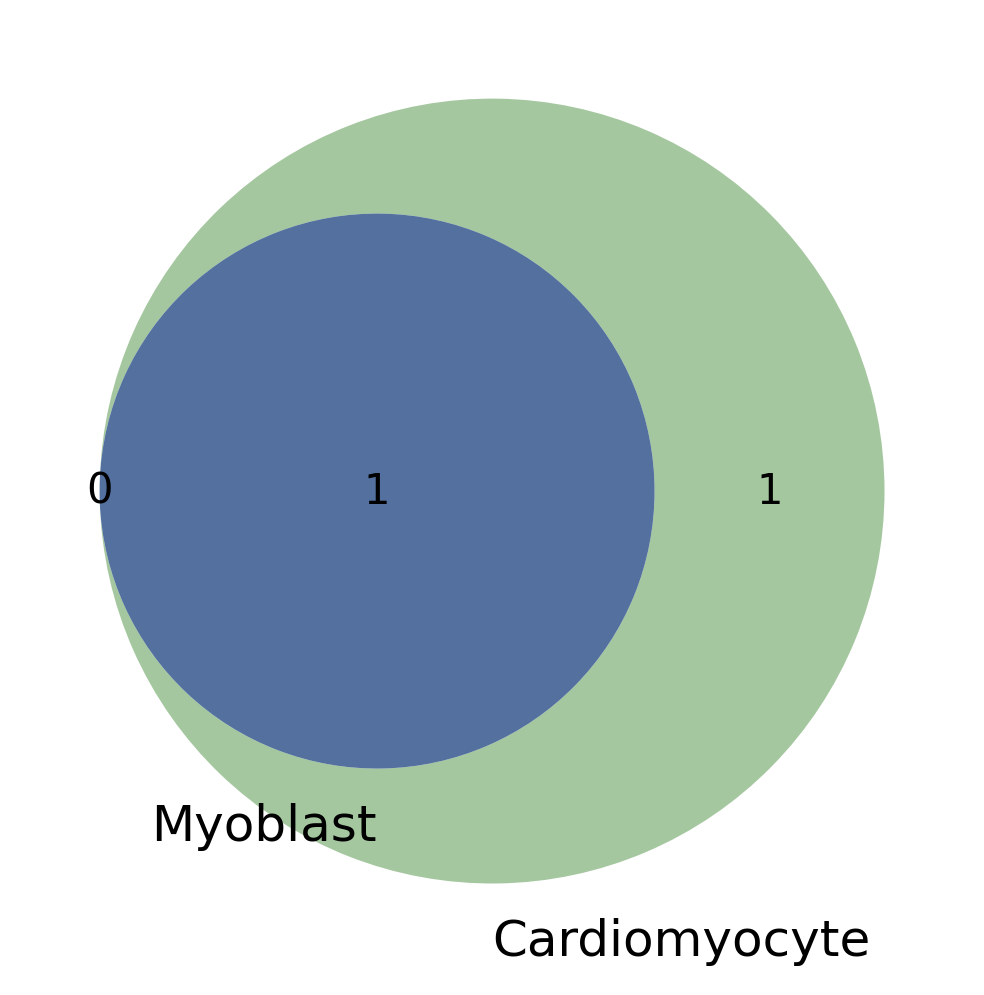

In [112]:
# com mt venn plot
plt.figure(figsize=(4,4), dpi=300) 

set1 = set(mt_sig_t1)
set2 = set(mt_sig_t20)

only_set2 = len(set1 - set2) 
only_set1 = len(set2 - set1) 
set1_and_set2 = len(set1 & set2) 

venn = venn2(subsets=(only_set1, only_set2, set1_and_set2), set_labels=('Myoblast', 'Cardiomyocyte'))

venn.get_patch_by_id('10').set_color(lightblue)
venn.get_patch_by_id('10').set_alpha(0.5) 
venn.get_patch_by_id('01').set_color(darkgreen)
venn.get_patch_by_id('01').set_alpha(0.5) 
venn.get_patch_by_id('11').set_color(darkblue)
venn.get_patch_by_id('11').set_alpha(0.8) 

for patch in venn.patches:
    patch.set_linewidth(0)

4
4


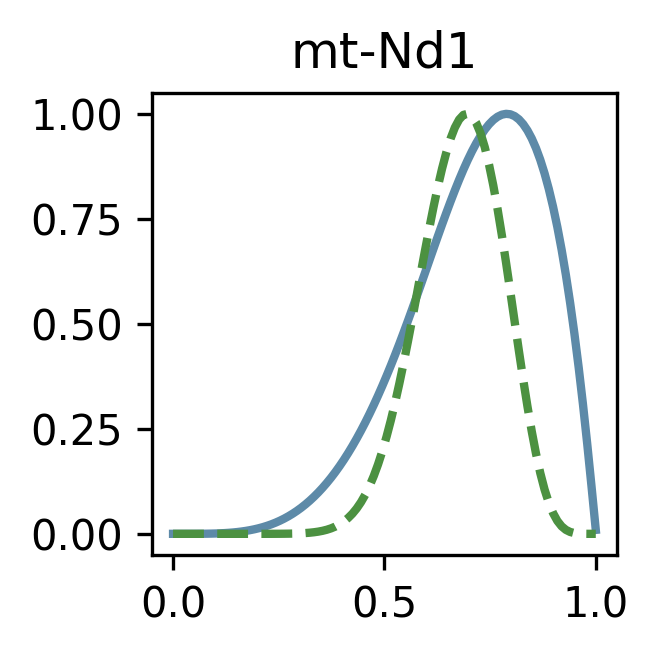

In [113]:
# lam of common mt genes
gl_com = list(set1 & set2)

nc = 5
nr = int(np.ceil(len(gl_com)/nc))
ss_nc = 2
ss_nr = 2
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr,nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.5)

gl = gl_com
for i, g in enumerate(gl):
    ax = plt.subplot(gs[i//nc, i%nc])
    t = '1'
    ig = np.where(genes_dict[t]==g)[0][0]
    lam = lam_dict[t][ig]
    lab = label_dict[t][ig]
    print(lab)
    x = np.linspace(0,1,100)
    y = (lam-np.min(lam))/(np.max(lam)-np.min(lam))
    ax.plot(x,y, color=lightblue, lw=2)
    t = '20'
    ig = np.where(genes_dict[t]==g)[0][0]
    lam = lam_dict[t][ig]
    lab = label_dict[t][ig]
    print(lab)
    x = np.linspace(0,1,100)
    y = (lam-np.min(lam))/(np.max(lam)-np.min(lam))
    ax.plot(x,y, color=darkgreen, linestyle='dashed', lw=2)
    ax.set_title(f'{g}')
    if i%nc !=0: ax.set_yticks([])

In [96]:
# check stereoseq cell type marker genes
type1_list = ['Myl2', 'Myh7', 'Tnnt2']
type20_list = ['Acta1', 'Myl1', 'Myh3']

# check cell type marker genes
t = '1'
genes_t = genes_dict[t]
labels_t = label_dict[t]
c1_label = []
for g in type1_list:
    j = np.where(genes_t==g)[0]
    if len(j)==1:
        c1_label.append(labels_t[j[0]])
    else:
        c1_label.append(-2)
c2_label = []
for g in type20_list:
    j = np.where(genes_t==g)[0]
    if len(j)==1:
        c2_label.append(labels_t[j[0]])
    else:
        c2_label.append(-2)
        
print(f'type {t}')
print(f'sig type1 marker {np.array(type1_list)[np.array(c1_label)>-1]} {np.array(c1_label)[np.array(c1_label)>-1]}')
print(f'sig type20 marker {np.array(type20_list)[np.array(c2_label)>-1]} {np.array(c2_label)[np.array(c2_label)>-1]}')

t = '20'
genes_t = genes_dict[t]
labels_t = label_dict[t]
c1_label = []
for g in type1_list:
    j = np.where(genes_t==g)[0]
    if len(j)==1:
        c1_label.append(labels_t[j[0]])
    else:
        c1_label.append(-2)
c2_label = []
for g in type20_list:
    j = np.where(genes_t==g)[0]
    if len(j)==1:
        c2_label.append(labels_t[j[0]])
    else:
        c2_label.append(-2)
        
print(f'type {t}')
print(f'sig type1 marker {np.array(type1_list)[np.array(c1_label)>-1]} {np.array(c1_label)[np.array(c1_label)>-1]}')
print(f'sig type20 marker {np.array(type20_list)[np.array(c2_label)>-1]} {np.array(c2_label)[np.array(c2_label)>-1]}')

type 1
sig type1 marker [] []
sig type20 marker [] []
type 20
sig type1 marker [] []
sig type20 marker ['Acta1' 'Myh3'] [4 4]


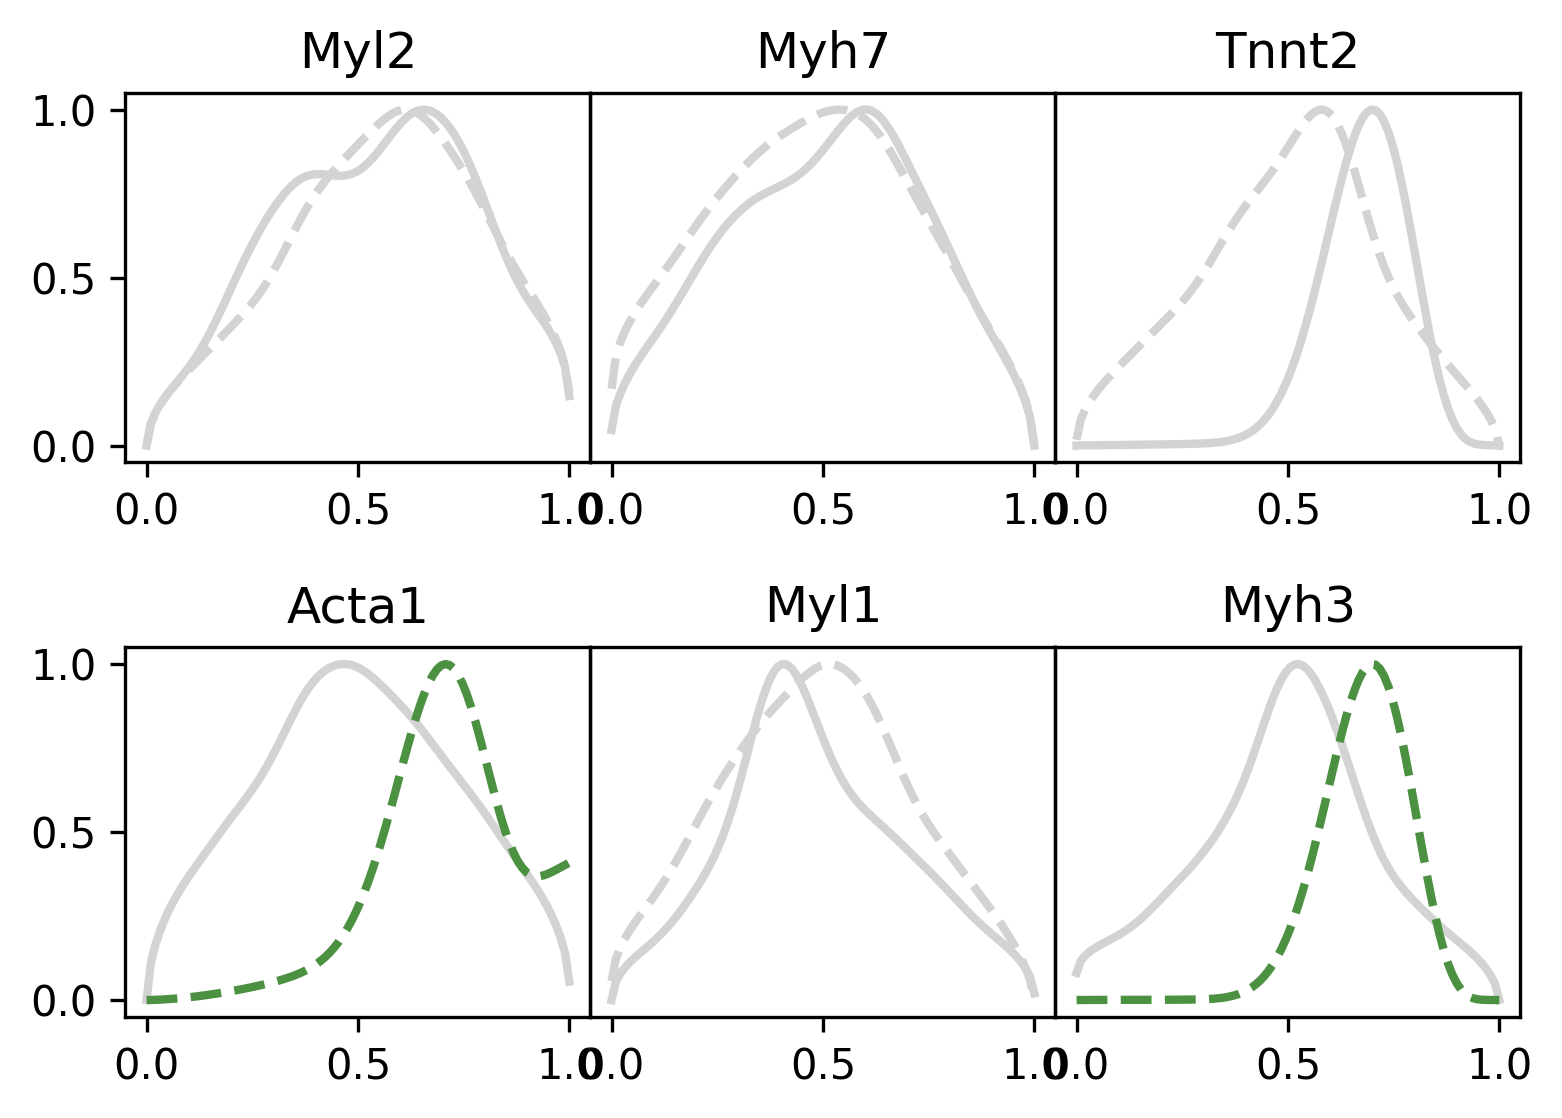

In [97]:
# lam of t1 and t20 marker genes
gl_com = type1_list + type20_list

nc = 3
nr = int(np.ceil(len(gl_com)/nc))
ss_nc = 2
ss_nr = 2
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr,nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.5)

gl = gl_com
for i, g in enumerate(gl):
    ax = plt.subplot(gs[i//nc, i%nc])
    t = '1'
    ig = np.where(genes_dict[t]==g)[0][0]
    lam = lam_dict[t][ig]
    lab1 = label_dict[t][ig]
    x = np.linspace(0,1,100)
    y = (lam-np.min(lam))/(np.max(lam)-np.min(lam))
    if lab1 != -1: 
        color=lightblue
    else:
        color=lightgray
    ax.plot(x,y, color=color, lw=2)
    t = '20'
    ig = np.where(genes_dict[t]==g)[0][0]
    lam = lam_dict[t][ig]
    lab20 = label_dict[t][ig] 
    x = np.linspace(0,1,100)
    y = (lam-np.min(lam))/(np.max(lam)-np.min(lam))
    if lab20 != -1: 
        color=darkgreen
    else:
        color=lightgray
    ax.plot(x,y, color=color, linestyle='dashed', lw=2)
    ax.set_title(f'{g}')
    if i%nc !=0: ax.set_yticks([])

In [98]:
# transcription factors
fn = 'input/Browse Transcription Factors mm9 - resource_browser.csv'
tab = pd.read_csv(fn)
tf_list = tab.Symbol.unique().tolist()

# type 1
t = '1'
list1_lower = [item.lower() for item in tf_list]
list2_lower = [item.lower() for item in np.array(genes_dict[t])[label_dict[t]!=-1]]
type1_tf = set(list1_lower).intersection(set(list2_lower))
print(f'#tf in type {t}={len(type1_tf)}')

# type 20
t = '20'
list1_lower = [item.lower() for item in tf_list]
list2_lower = [item.lower() for item in np.array(genes_dict[t])[label_dict[t]!=-1]]
type20_tf = set(list1_lower).intersection(set(list2_lower))
print(f'#tf in type {t}={len(type20_tf)}')

#tf in type 1=39
#tf in type 20=28


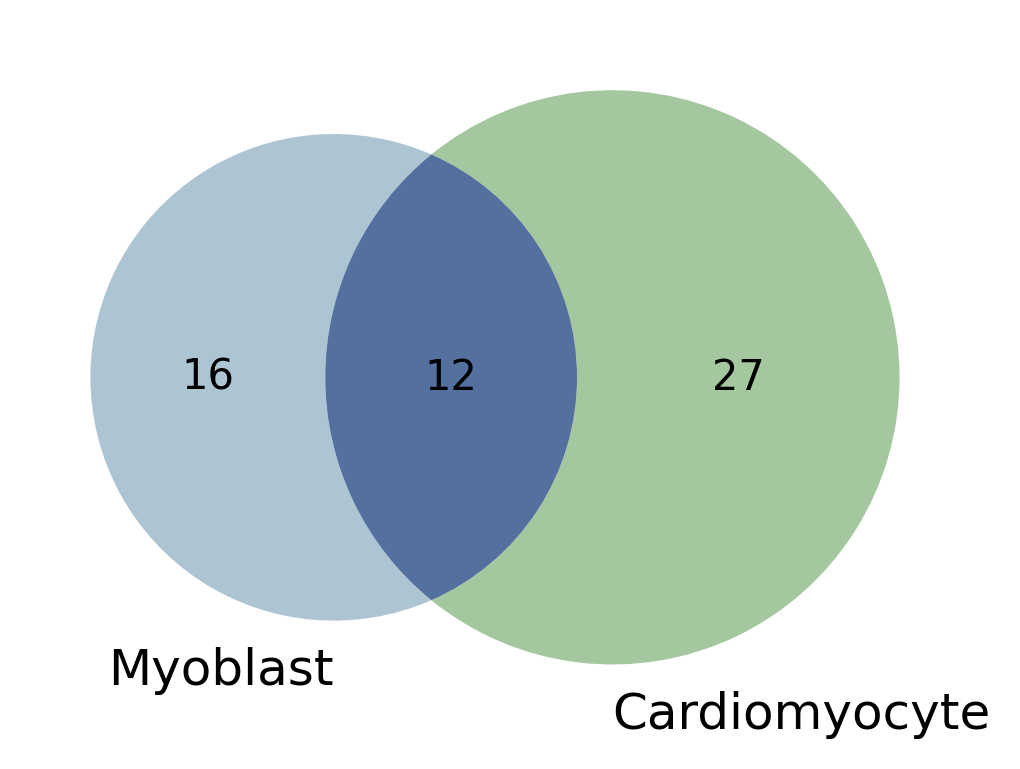

In [99]:
# com tf venn plot
plt.figure(figsize=(4,4), dpi=300) 

set1 = set(type20_tf)
set2 = set(type1_tf)

only_set1 = len(set1 - set2) 
only_set2 = len(set2 - set1) 
set1_and_set2 = len(set1 & set2) 

venn = venn2(subsets=(only_set1, only_set2, set1_and_set2), set_labels=('Myoblast', 'Cardiomyocyte'))

venn.get_patch_by_id('10').set_color(lightblue)
venn.get_patch_by_id('10').set_alpha(0.5) 
venn.get_patch_by_id('01').set_color(darkgreen)
venn.get_patch_by_id('01').set_alpha(0.5) 
venn.get_patch_by_id('11').set_color(darkblue)
venn.get_patch_by_id('11').set_alpha(0.8) 

for patch in venn.patches:
    patch.set_linewidth(0)

In [100]:
# over representation analysis or GSEA
import gseapy
from gseapy import ringplot
from gseapy import barplot, dotplot

In [101]:
# list available mouse genesets
gseapy.get_library_name(organism='Mouse')

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_2024',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbatio

In [102]:
# select genesets
genesets_selected = [
#     'MSigDB_Computational',
#     'MSigDB_Hallmark_2020',
#     'MSigDB_Oncogenic_Signatures',
    
#     'ENCODE_Histone_Modifications_2013',
#     'ENCODE_Histone_Modifications_2015',
#     'ENCODE_TF_ChIP-seq_2014',
#     'ENCODE_TF_ChIP-seq_2015',
#     'ENCODE_and_ChEA_Consensus_TFs_from_ChIP-X',
    
    'GO_Biological_Process_2021',
#     'GO_Cellular_Component_2021',
#     'GO_Molecular_Function_2021',
#     'KEGG_2019_Mouse',
    
#     'ARCHS4_TFs_Coexp',
#     'Chromosome_Location', # nonsig
#     'Chromosome_Location_hg19', # nonsig    
#     'WikiPathways_2019_Mouse',
#     'InterPro_Domains_2019',
#     'Pfam_Domains_2019',
#     'Pfam_InterPro_Domains', # not applicable
#     'lncHUB_lncRNA_Co-Expression',
#     'miRTarBase_2017' # nonsig
#     'ENCODE_TF_ChIP-seq_2015',
]
print(f'#gs selected={len(genesets_selected)}')

#gs selected=1


N=8


Text(0.5, 0, '-log10(P)')

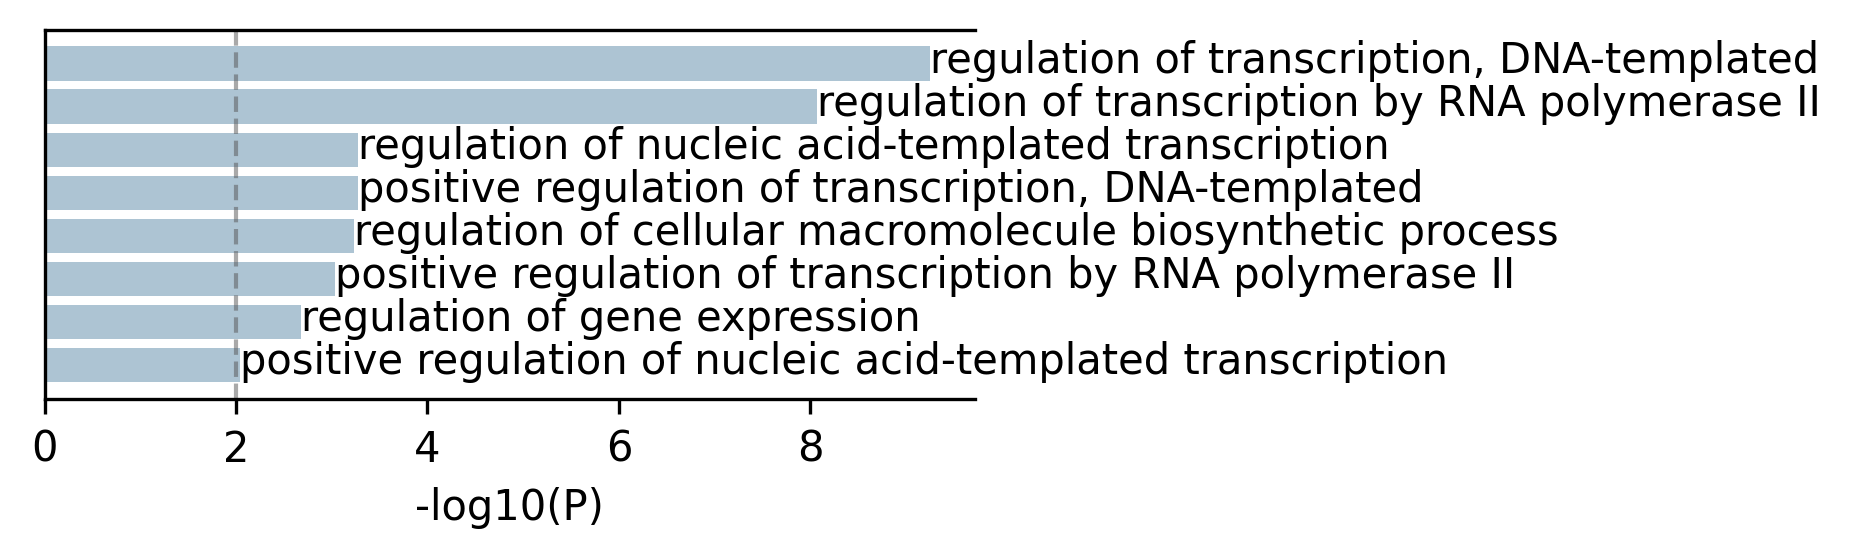

In [103]:
# Myoblast unique tfs

# N = 30 # <<< num of tops sets to show
colors = [red, lightgreen, lightblue, purple]
labels_all = np.concatenate(list(label_dict.values()), axis=0) 
genes_all = np.concatenate(list(genes_dict.values()), axis=0) 

gl = list(set1 - set2) 
bg = genes_dict['1'].tolist() + genes_dict['20'].tolist()

enr_k = gseapy.enrichr(
    gene_list = gl,
    gene_sets = genesets_selected,
    background = bg, # ???
    organism='Mouse',
    outdir=None
)

res_k = enr_k.results.sort_values('Adjusted P-value')
set_labels_k = res_k.Gene_set.values
ratios_k = res_k.Overlap.values
set_size_k = []
set_overlap_k = []
for r in ratios_k:
    r1, r2 = r.split('/')
    set_size_k.append(r1)
    set_overlap_k.append(r2)
set_size_k = np.array(set_size_k)
set_overlap_k = np.array(set_overlap_k)
term_k = res_k.Term.values
pv_k = res_k['Adjusted P-value'].values
log10pv_k = -np.log10(pv_k)

N = np.sum(log10pv_k>=2)
print(f'N={N}')

ss = set_labels_k[:N]
tt = term_k[:N]
y_value = term_k[:N]
y_pos = np.flip(np.arange(N))
x_value = log10pv_k[:N]

nr = 1
nc = 1
ss_nr = N/10 * 2
ss_nc = 4
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr,nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.5)
ax = plt.subplot(gs[0, 0])

ax.barh(y_pos, 
        x_value, 
        color = lightblue,
        alpha=0.5,
        align='center')

for i in range(N): # add geneset names
    tt_i = tt[i]
    set_name_i = (tt_i.split('('))[0]
    ax.text(x_value[i], y_pos[i]-0.2, set_name_i, ha='left', c='k', fontsize=10) 
ax.spines['right'].set_visible(False)
ax.set_yticks([])
ax.axvline(x = 2, color = darkgray, lw=1, alpha=0.5, linestyle='dashed') # line at -log10p=2
ax.set_xlabel(f'-log10(P)')

In [104]:
# Card unique TFs
print(list(set2 - set1))

['tcf7l2', 'meis2', 'zfp608', 'pbx3', 'lrrfip2', 'zcchc11', 'hopx', 'etv6', 'tead1', 'zfp148', 'pbx1', 'nfib', 'esrrg', 'arid1a', 'zfp644', 'lrrfip1', 'zfpm2', 'zfp36l1', 'bptf', 'zfp280d', 'zeb2', 'creb5', 'bclaf1', 'crebbp', 'nfat5', 'ebf1', 'zeb1']


N=17


Text(0.5, 0, '-log10(P)')

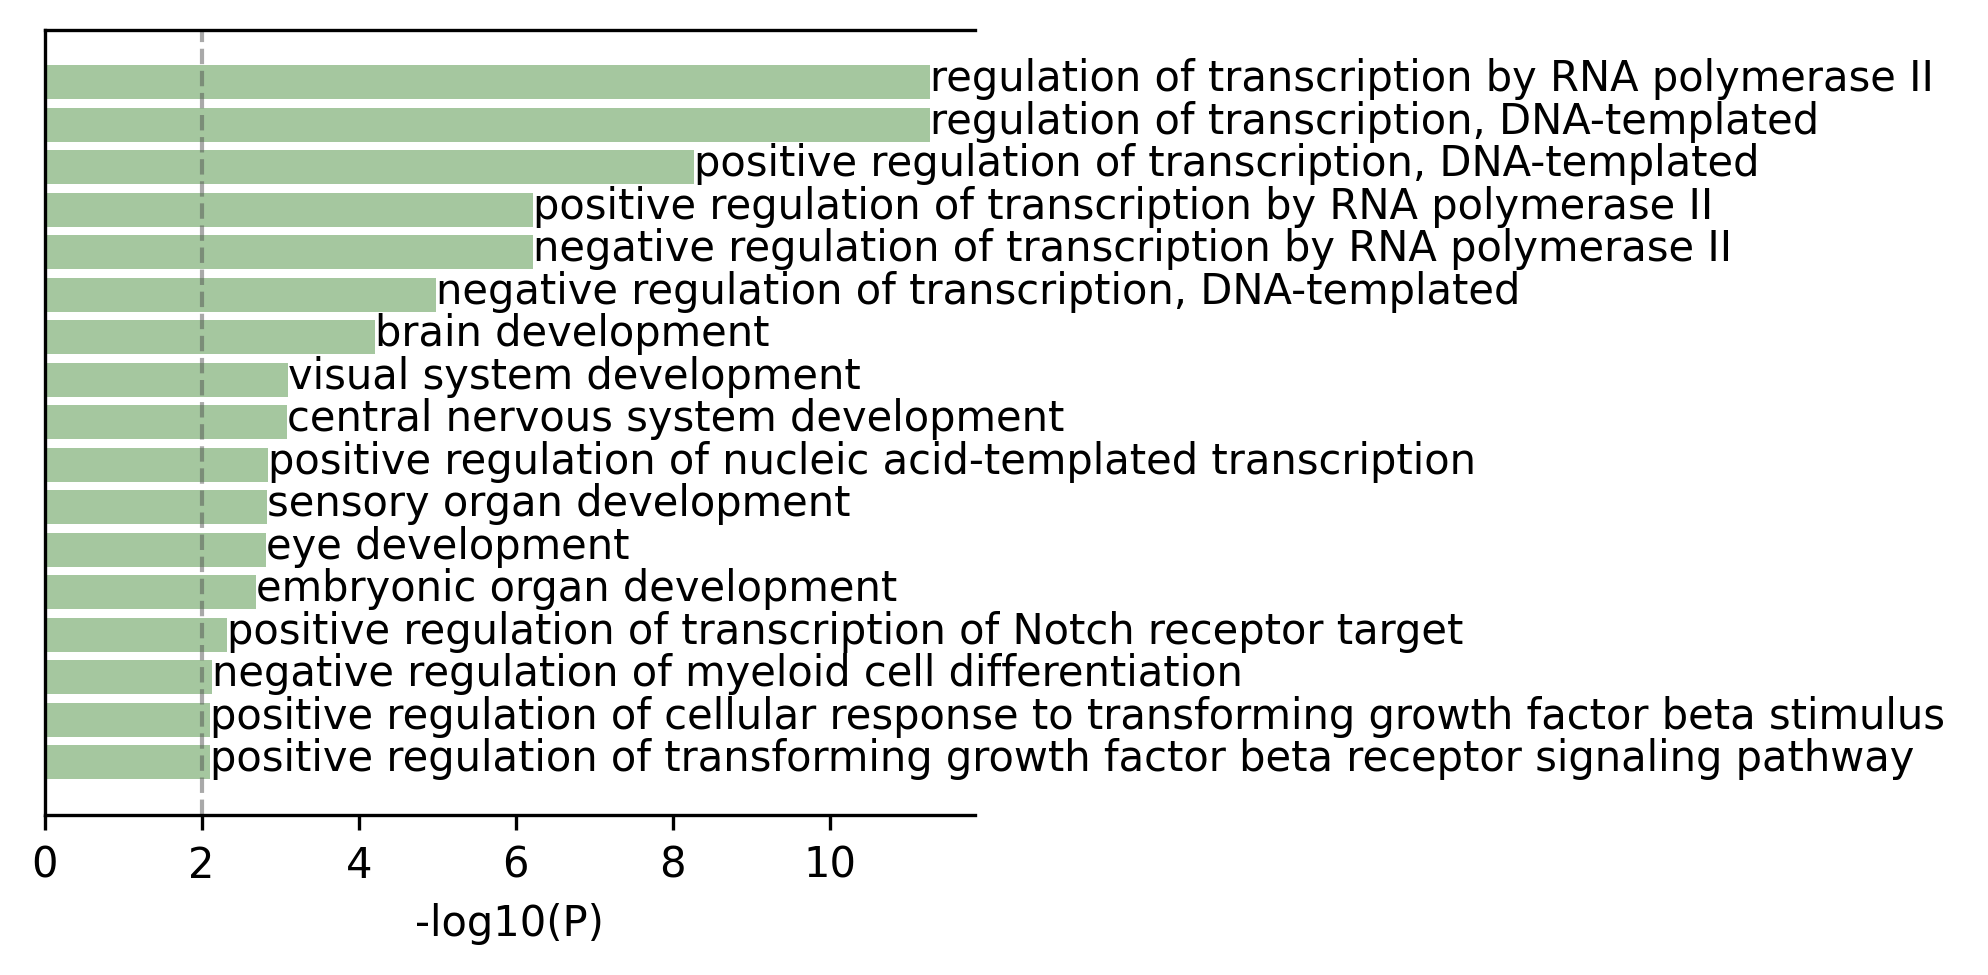

In [109]:
# Card unique tfs

# N = 30 # <<< num of tops sets to show
colors = [red, lightgreen, lightblue, purple]
labels_all = np.concatenate(list(label_dict.values()), axis=0) 
genes_all = np.concatenate(list(genes_dict.values()), axis=0) 

gl = list(set2 - set1) 
bg = genes_dict['1'].tolist() + genes_dict['20'].tolist()

enr_k = gseapy.enrichr(
    gene_list = gl,
    gene_sets = genesets_selected,
    background = bg, # ???
    organism='Mouse',
    outdir=None
)

res_k = enr_k.results.sort_values('Adjusted P-value')
set_labels_k = res_k.Gene_set.values
ratios_k = res_k.Overlap.values
set_size_k = []
set_overlap_k = []
for r in ratios_k:
    r1, r2 = r.split('/')
    set_size_k.append(r1)
    set_overlap_k.append(r2)
set_size_k = np.array(set_size_k)
set_overlap_k = np.array(set_overlap_k)
term_k = res_k.Term.values
pv_k = res_k['Adjusted P-value'].values
log10pv_k = -np.log10(pv_k)

N = np.sum(log10pv_k>=2)
print(f'N={N}')

ss = set_labels_k[:N]
tt = term_k[:N]
y_value = term_k[:N]
y_pos = np.flip(np.arange(N))
x_value = log10pv_k[:N]

nr = 1
nc = 1
ss_nr = N/10 * 2
ss_nc = 4
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr,nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.5)
ax = plt.subplot(gs[0, 0])

ax.barh(y_pos, 
        x_value, 
        color = darkgreen,
        alpha=0.5,
        align='center')

for i in range(N): # add geneset names
    tt_i = tt[i]
    set_name_i = (tt_i.split('('))[0]
    ax.text(x_value[i], y_pos[i]-0.2, set_name_i, ha='left', c='k', fontsize=10) 
ax.spines['right'].set_visible(False)
ax.set_yticks([])
ax.axvline(x = 2, color = darkgray, lw=1, alpha=0.5, linestyle='dashed') # line at -log10p=2
ax.set_xlabel(f'-log10(P)')

N=3


Text(0.5, 0, '-log10(P)')

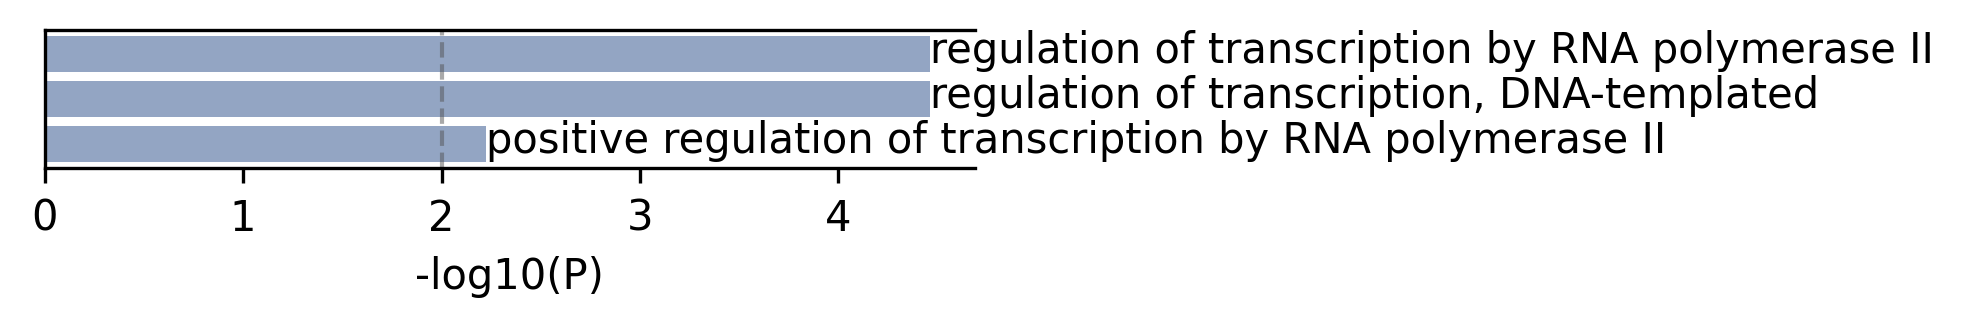

In [108]:
# com tfs

# N = 30 # <<< num of tops sets to show
colors = [red, lightgreen, lightblue, purple]
labels_all = np.concatenate(list(label_dict.values()), axis=0) 
genes_all = np.concatenate(list(genes_dict.values()), axis=0) 

gl = list(set1 & set2) 
bg = genes_dict['1'].tolist() + genes_dict['20'].tolist()

enr_k = gseapy.enrichr(
    gene_list = gl,
    gene_sets = genesets_selected,
    background = bg, # ???
    organism='Mouse',
    outdir=None
)

res_k = enr_k.results.sort_values('Adjusted P-value')
set_labels_k = res_k.Gene_set.values
ratios_k = res_k.Overlap.values
set_size_k = []
set_overlap_k = []
for r in ratios_k:
    r1, r2 = r.split('/')
    set_size_k.append(r1)
    set_overlap_k.append(r2)
set_size_k = np.array(set_size_k)
set_overlap_k = np.array(set_overlap_k)
term_k = res_k.Term.values
pv_k = res_k['Adjusted P-value'].values
log10pv_k = -np.log10(pv_k)

N = np.sum(log10pv_k>=2)
print(f'N={N}')

ss = set_labels_k[:N]
tt = term_k[:N]
y_value = term_k[:N]
y_pos = np.flip(np.arange(N))
x_value = log10pv_k[:N]

nr = 1
nc = 1
ss_nr = N/10 * 2
ss_nc = 4
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr,nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.5)
ax = plt.subplot(gs[0, 0])

ax.barh(y_pos, 
        x_value, 
        color = darkblue,
        alpha=0.5,
        align='center')

for i in range(N): # add geneset names
    tt_i = tt[i]
    set_name_i = (tt_i.split('('))[0]
    ax.text(x_value[i], y_pos[i]-0.2, set_name_i, ha='left', c='k', fontsize=10) 
ax.spines['right'].set_visible(False)
ax.set_yticks([])
ax.axvline(x = 2, color = darkgray, lw=1, alpha=0.5, linestyle='dashed') # line at -log10p=2
ax.set_xlabel(f'-log10(P)')